In [173]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, AffinityPropagation
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import scipy
import scipy.cluster.hierarchy as sch
from kmodes.kmodes import KModes
import matplotlib.cm as cm
%matplotlib inline

In [174]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

### Read in the Data 

In [175]:
df_v1 = pd.read_csv("./Data/version_1_non_num_cld.csv", index_col = "Unnamed: 0")
df_v2 = pd.read_csv("./Data/version_2_non_num_cld.csv", index_col = "Unnamed: 0")
df_v3 = pd.read_csv("./Data/version_3_non_num_cld.csv", index_col = "Unnamed: 0")
df_v4 = pd.read_csv("./Data/version_4_non_num_cld.csv", index_col = "Unnamed: 0")

In [176]:
df_v1.head(2)

,ID,HOU,GOV,SEX,SEN,AGE8,AGEBYRACE,CDNUM,EDUC18,LATINO,PARTYBYRACE,PARTYID,PARTYSEX,PHIL3,PTYIDEO7,QRACEAI,REGION,SIZEPLAC,SUBURBWHITE,VERSION,WEIGHT,SEXBYRACE,RACE2B,STANUM,ELECTSECFOREIGN18,KAVANAUGH18,TRUMP4,VOTE2016,TRUMPFP18,CONTROLHOUSE,VETVOTER,FTVOTER18,ABORTION18
201,25681,The Democratic candidate,The Democratic candidate,Male,The Democratic candidate,25-29,Latino 18-29,42,Bachelor's degree (BA or BS),Yes,Latino Democrat,Democrat,Democratic Men,Liberal,Liberal Democrats,Hispanic/Latino,West,Suburbs,Other,Version 1,1.537651,Latino men,Non-white,California,Yes,Oppose,Strongly disapprove,Hillary Clinton,The U.S. less safe,The Democratic Party,No,Yes,Keep it as is
202,25682,The Democratic candidate,The Democratic candidate,Male,The Democratic candidate,30-39,White 30-44,52,Bachelor's degree (BA or BS),No,White Democrat,Democrat,Democratic Men,Conservative,Mod/Conserv. Democrats,White,West,"Cities over 500,000",Other,Version 1,9.560690,White men,White,California,No,Oppose,Strongly disapprove,Didn't vote,No difference,The Democratic Party,No,Yes,Keep it as is


### Exploratory Data Analysis
The purpose of this project is to identify characteristics of different political subgroups. Using the feature combination PTYIDEO7, we are able to narrow down the political party and philosophy of survey participants. The rest of this notebook will include a look at each of the characteristics of the 7 political subgroups 

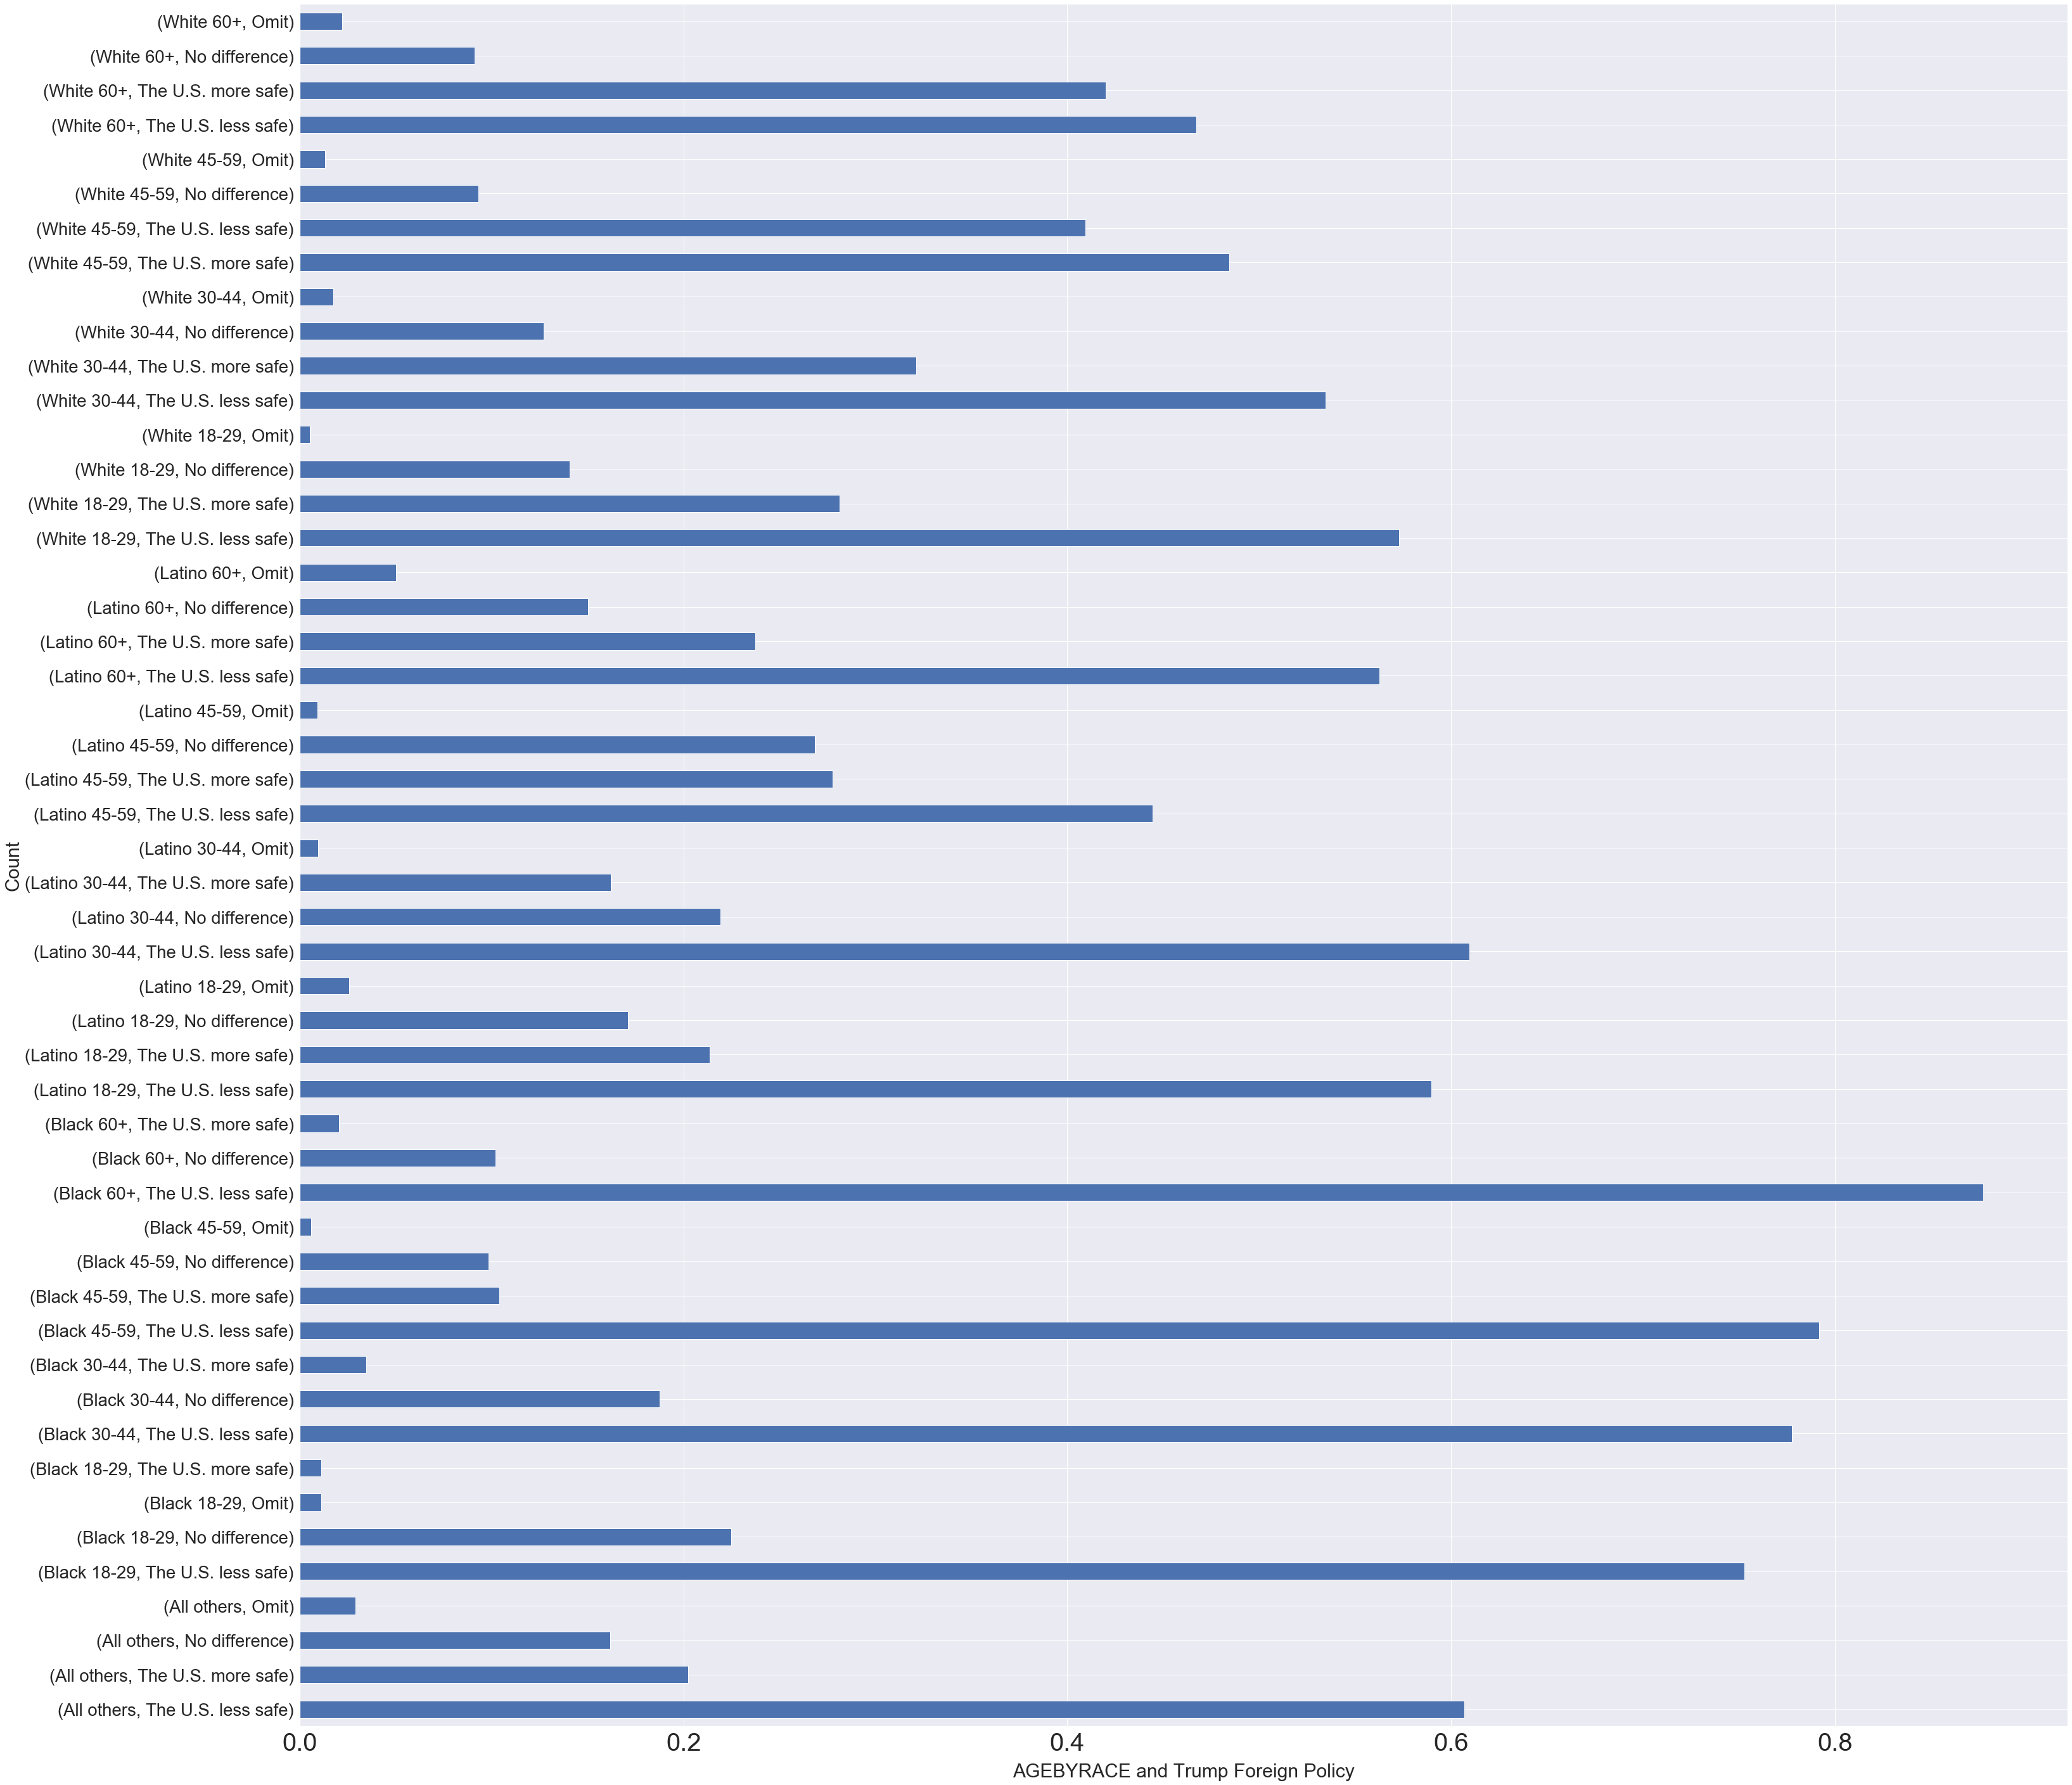

In [183]:
df_v1.groupby('AGEBYRACE').TRUMPFP18.value_counts(normalize = True).plot(kind = 'barh', figsize = (50,50), rot = 0)
plt.xlabel('AGEBYRACE and Trump Foreign Policy', labelpad = 12 )
plt.ylabel('Count')
plt.tick_params(axis='x', which='major', labelsize= 40)

In [281]:
df_v1['PTYIDEO7'].value_counts()

Liberal Democrats            848
Conservative Republicans     740
Mod/Conserv. Democrats       731
Moderate Independents        609
Mod./Liberal Republicans     315
Conservative Independents    245
Liberal Independents         243
Name: PTYIDEO7, dtype: int64

### Liberal Democrats 

This group variable allows me to plot based on Age and Race as well as who the participant voted for in 2016

In [288]:
group_age_by_race = df_v1['AGEBYRACE'].unique()
group_age_by_race = sorted(group_age_by_race, reverse=True)
group_vote_2016 = df_v1['VOTE2016'].unique()
group_vote_2016 = sorted(group_vote_2016, reverse=True)
group_poly_afil = df_v1['PTYIDEO7'].unique()
group_poly_afil = sorted(group_poly_afil, reverse=True)

In [280]:
df_v1_lib_dems = df_v1[df_v1['PTYIDEO7'] == 'Liberal Democrats']

### Plotting!
Thr graphs show normalized distributions of different variable counts based on party affiliation and political ideology 

#### Plot that shows AGEBYRACE and who the person voted for in 2016 

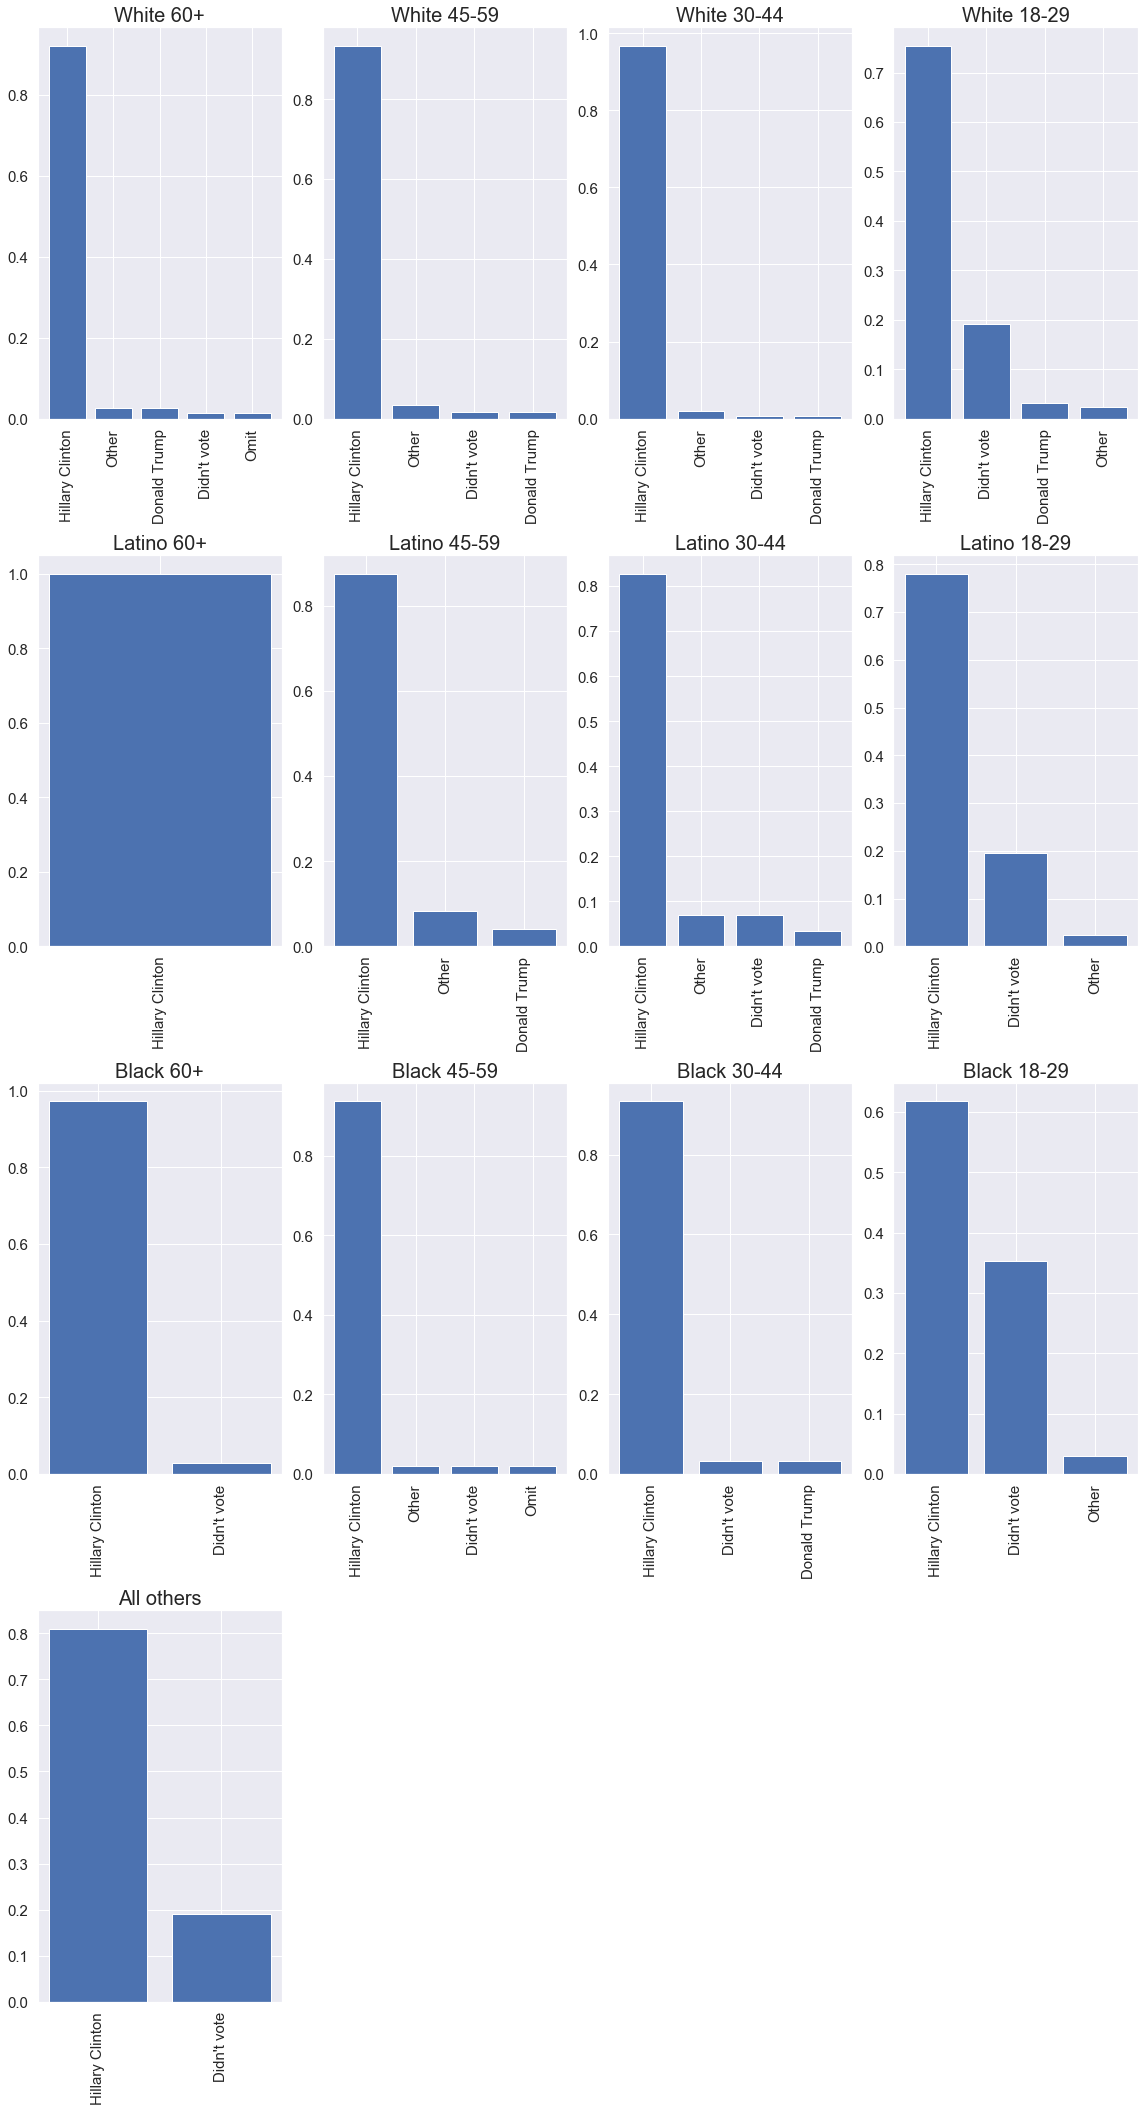

In [203]:
plt.figure(figsize=(16, 50))
for i, g in enumerate(group_age_by_race):
    
    plt.subplot(7, 4, i+1)
    data = df_v1_lib_dems[df_v1_lib_dems['AGEBYRACE']==g]['VOTE2016'].value_counts(normalize=True)
    plt.bar(x=data.index, height=data)
    plt.xticks(rotation=90)
    plt.title(g, fontdict={'fontsize': 20})
    plt.tick_params(axis='x', which='major', labelsize= 15)
    plt.tick_params(axis='y', labelsize=15)
    plt.tight_layout()

#### Plot that shows AGEBYRACE and whether or not the participant was a first time voter 

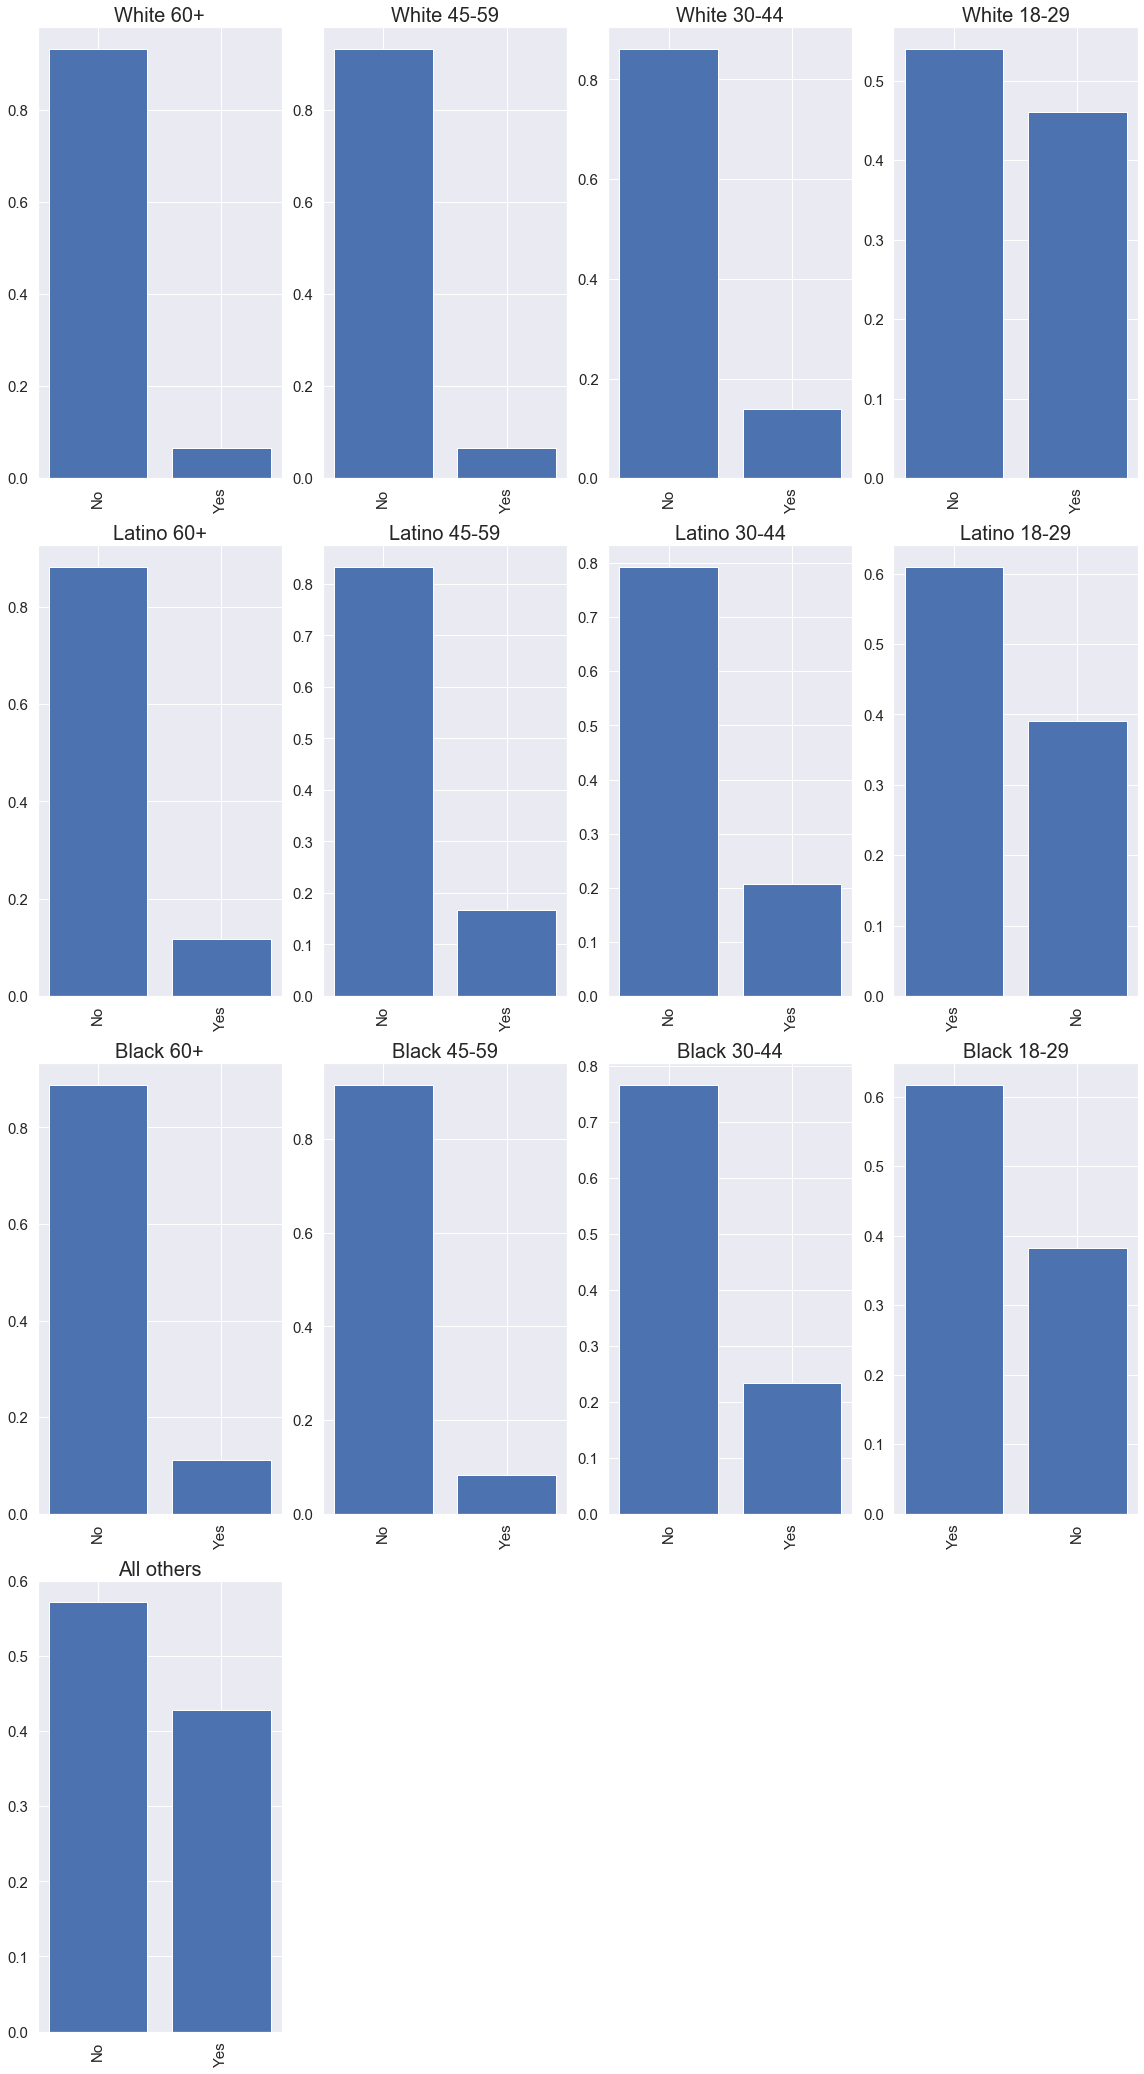

In [204]:
plt.figure(figsize=(16, 50))
for i, g in enumerate(group_age_by_race):
    
    plt.subplot(7, 4, i+1)
    data = df_v1_lib_dems[df_v1_lib_dems['AGEBYRACE']==g]['FTVOTER18'].value_counts(normalize=True)
    plt.bar(x=data.index, height=data)
    plt.xticks(rotation=90)
    plt.title(g, fontdict={'fontsize': 20})
    plt.tick_params(axis='x', which='major', labelsize= 15)
    plt.tick_params(axis='y', labelsize=15)
    plt.tight_layout()

#### Plot that shows who a participant voted for in 2016 and their support of Trump

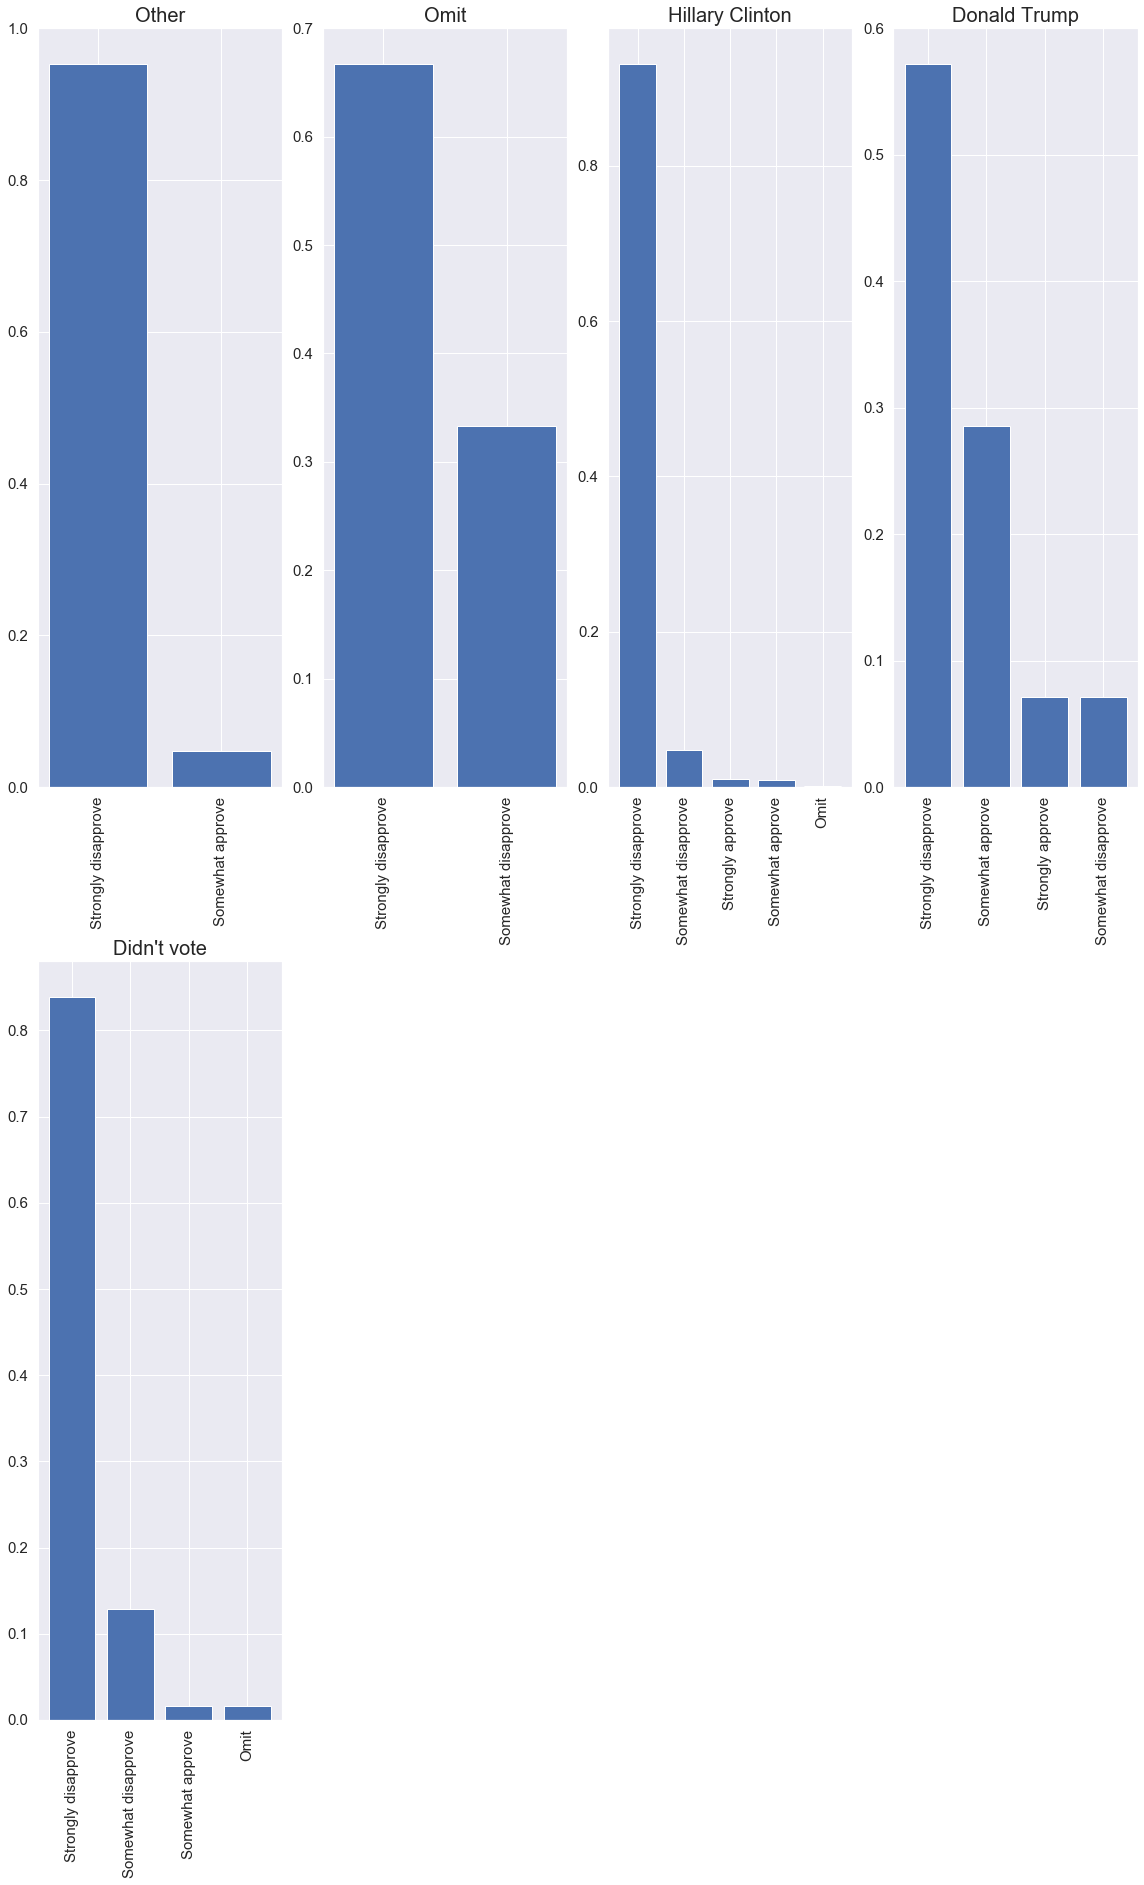

In [206]:
plt.figure(figsize=(16, 50))
for i, g in enumerate(group_vote_2016):
    
    plt.subplot(4, 4, i+1)
    data = df_v1_lib_dems[df_v1_lib_dems['VOTE2016']==g]['TRUMP4'].value_counts(normalize=True)
    plt.bar(x=data.index, height=data)
    plt.xticks(rotation=90)
    plt.title(g, fontdict={'fontsize': 20})
    plt.tick_params(axis='x', which='major', labelsize= 15)
    plt.tick_params(axis='y', labelsize=15)
    plt.tight_layout()

In [208]:
df_v1_lib_dems[(df_v1_lib_dems['VOTE2016'] == 'Donald Trump') & (df_v1_lib_dems['TRUMP4'] == 'Strongly disapprove')]

,ID,HOU,GOV,SEX,SEN,AGE8,AGEBYRACE,CDNUM,EDUC18,LATINO,PARTYBYRACE,PARTYID,PARTYSEX,PHIL3,PTYIDEO7,QRACEAI,REGION,SIZEPLAC,SUBURBWHITE,VERSION,WEIGHT,SEXBYRACE,RACE2B,STANUM,ELECTSECFOREIGN18,KAVANAUGH18,TRUMP4,VOTE2016,TRUMPFP18,CONTROLHOUSE,VETVOTER,FTVOTER18,ABORTION18
6397,36684,The Democratic candidate,The Democratic candidate,Female,The Democratic candidate,50-59,Latino 45-59,13,Bachelor's degree (BA or BS),Yes,Latino Democrat,Democrat,Democratic Women,Liberal,Liberal Democrats,Black,Midwest,Suburbs,Other,Version 1,0.696820,Latino women,Non-white,Michigan,No,Oppose,Strongly disapprove,Donald Trump,The U.S. less safe,The Democratic Party,No,No,Overturn it
6415,36734,The Democratic candidate,The Democratic candidate,Male,The Democratic candidate,30-39,Latino 30-44,3,Attended college but received no degree,Yes,Latino Democrat,Democrat,Democratic Men,Liberal,Liberal Democrats,Hispanic/Latino,Midwest,Suburbs,Other,Version 1,0.630855,Latino men,Non-white,Michigan,No,Oppose,Strongly disapprove,Donald Trump,No difference,The Democratic Party,No,No,Keep it as is
6525,37020,The Democratic candidate,The Democratic candidate,Male,The Democratic candidate,60-64,White 60+,8,Attended college but received no degree,No,White Democrat,Democrat,Democratic Men,Liberal,Liberal Democrats,White,South,Suburbs,White suburban men,Version 1,1.585444,White men,White,Florida,No,Oppose,Strongly disapprove,Donald Trump,The U.S. less safe,The Democratic Party,Yes,No,Keep it as is
6789,37770,The Democratic candidate,The Democratic candidate,Female,The Democratic candidate,18-24,White 18-29,6,Bachelor's degree (BA or BS),No,White Democrat,Democrat,Democratic Women,Liberal,Liberal Democrats,White,Midwest,Suburbs,White suburban women,Version 1,0.362791,White women,White,Minnesota,No,Oppose,Strongly disapprove,Donald Trump,The U.S. less safe,The Democratic Party,No,No,Keep it as is
6790,37771,The Democratic candidate,The Democratic candidate,Female,The Democratic candidate,18-24,White 18-29,6,Bachelor's degree (BA or BS),No,White Democrat,Democrat,Democratic Women,Liberal,Liberal Democrats,White,Midwest,Suburbs,White suburban women,Version 1,0.362791,White women,White,Minnesota,No,Oppose,Strongly disapprove,Donald Trump,The U.S. less safe,The Democratic Party,No,No,Keep it as is
11312,49886,The Democratic candidate,NaN,Female,The Democratic candidate,60-64,White 60+,1,Never attended college,No,White Democrat,Democrat,Democratic Women,Liberal,Liberal Democrats,White,East,Suburbs,White suburban women,Version 1,0.261045,White women,White,Delaware,No,Oppose,Strongly disapprove,Donald Trump,The U.S. less safe,The Democratic Party,No,No,Keep it as is
13825,57199,The Democratic candidate,The Democratic candidate,Female,NaN,60-64,White 60+,2,Bachelor's degree (BA or BS),No,White Democrat,Democrat,Democratic Women,Liberal,Liberal Democrats,White,West,"Cities 50,000-500,000",Other,Version 1,0.889726,White women,White,Idaho,Omit,Oppose,Strongly disapprove,Donald Trump,The U.S. more safe,The Democratic Party,No,No,Keep it as is
15637,61797,The Democratic candidate,The Democratic candidate,Male,NaN,30-39,Black 30-44,1,Associate's degree (AA or AS),No,Black Democrat,Democrat,Democratic Men,Liberal,Liberal Democrats,Black,Midwest,"Cities over 500,000",Other,Version 1,0.273446,Black men,Non-white,Illinois,Yes,Oppose,Strongly disapprove,Donald Trump,The U.S. less safe,The Democratic Party,Yes,No,Keep it as is


This graphic is one of the most interesting as it shows that among liberal democrats who voted for Trump, the majority are having buyers remorse. 

Unsuprisingly most liberals voted for Hillary Clinton, the big suprise was the number of blacks between the ages of 18-29 who did not vote. Now this can be accounted for through a couple things. In the survey there were 36 participants that fit into this demographic. 

Even more first time voters were the majority in only Latinos 18-29 and blacks in that same age group. White voters between that range did not fit in that age group. 

### Moderate/Conservative Democrats 

In [282]:
df_v1_mod_con_dems = df_v1[df_v1['PTYIDEO7'] == 'Mod/Conserv. Democrats']

#### Plot that shows AGEBYRACE and who the person voted for in 2016 

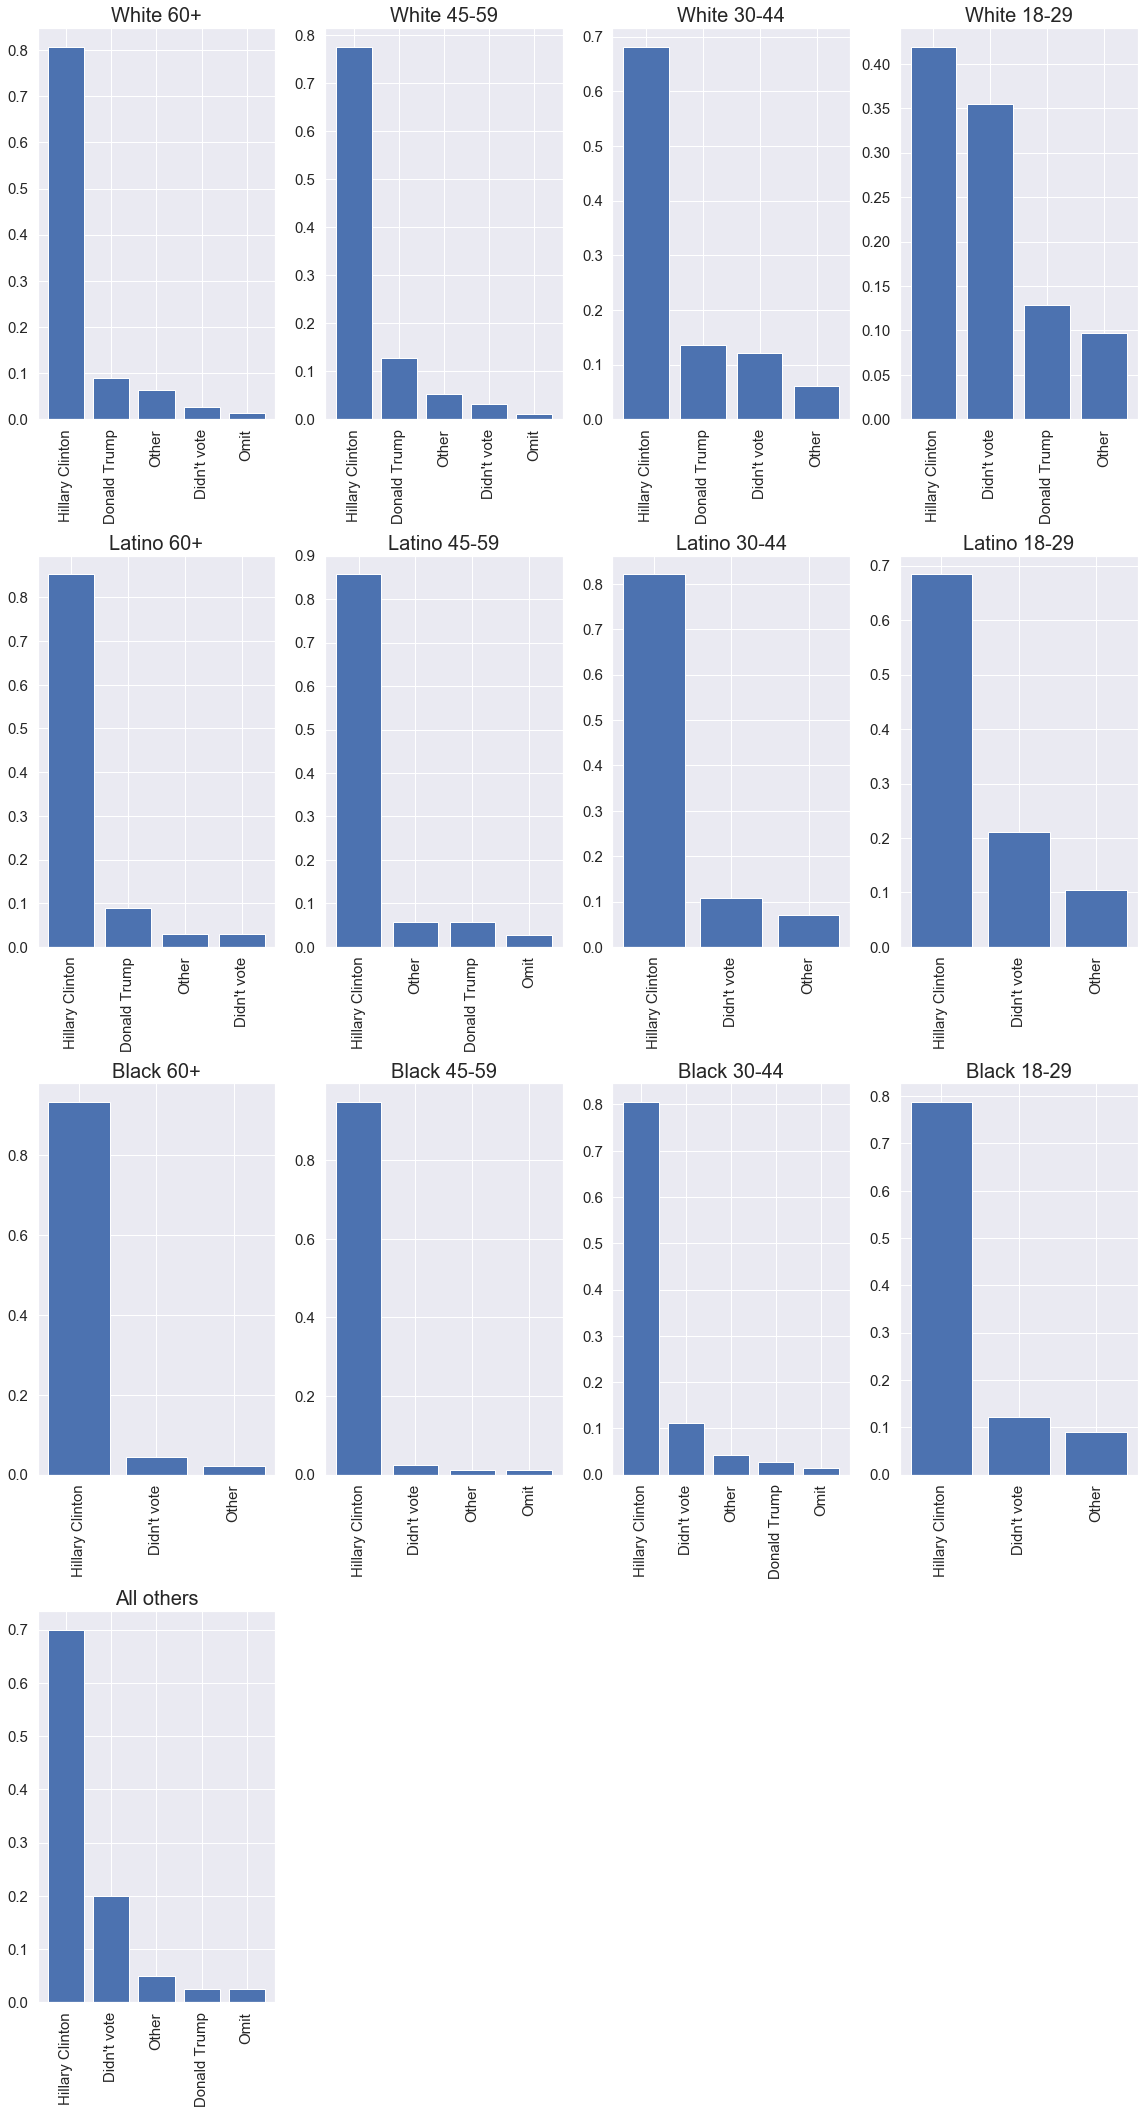

In [217]:
plt.figure(figsize=(16, 50))
for i, g in enumerate(group_age_by_race):
    
    plt.subplot(7, 4, i+1)
    data = df_v1_mod_con_dems[df_v1_mod_con_dems['AGEBYRACE']==g]['VOTE2016'].value_counts(normalize=True)
    plt.bar(x=data.index, height=data)
    plt.xticks(rotation=90)
    plt.title(g, fontdict={'fontsize': 20})
    plt.tick_params(axis='x', which='major', labelsize= 15)
    plt.tick_params(axis='y', labelsize=15)
    plt.tight_layout()

#### Plot that shows AGEBYRACE and whether or not the participant was a first time voter 

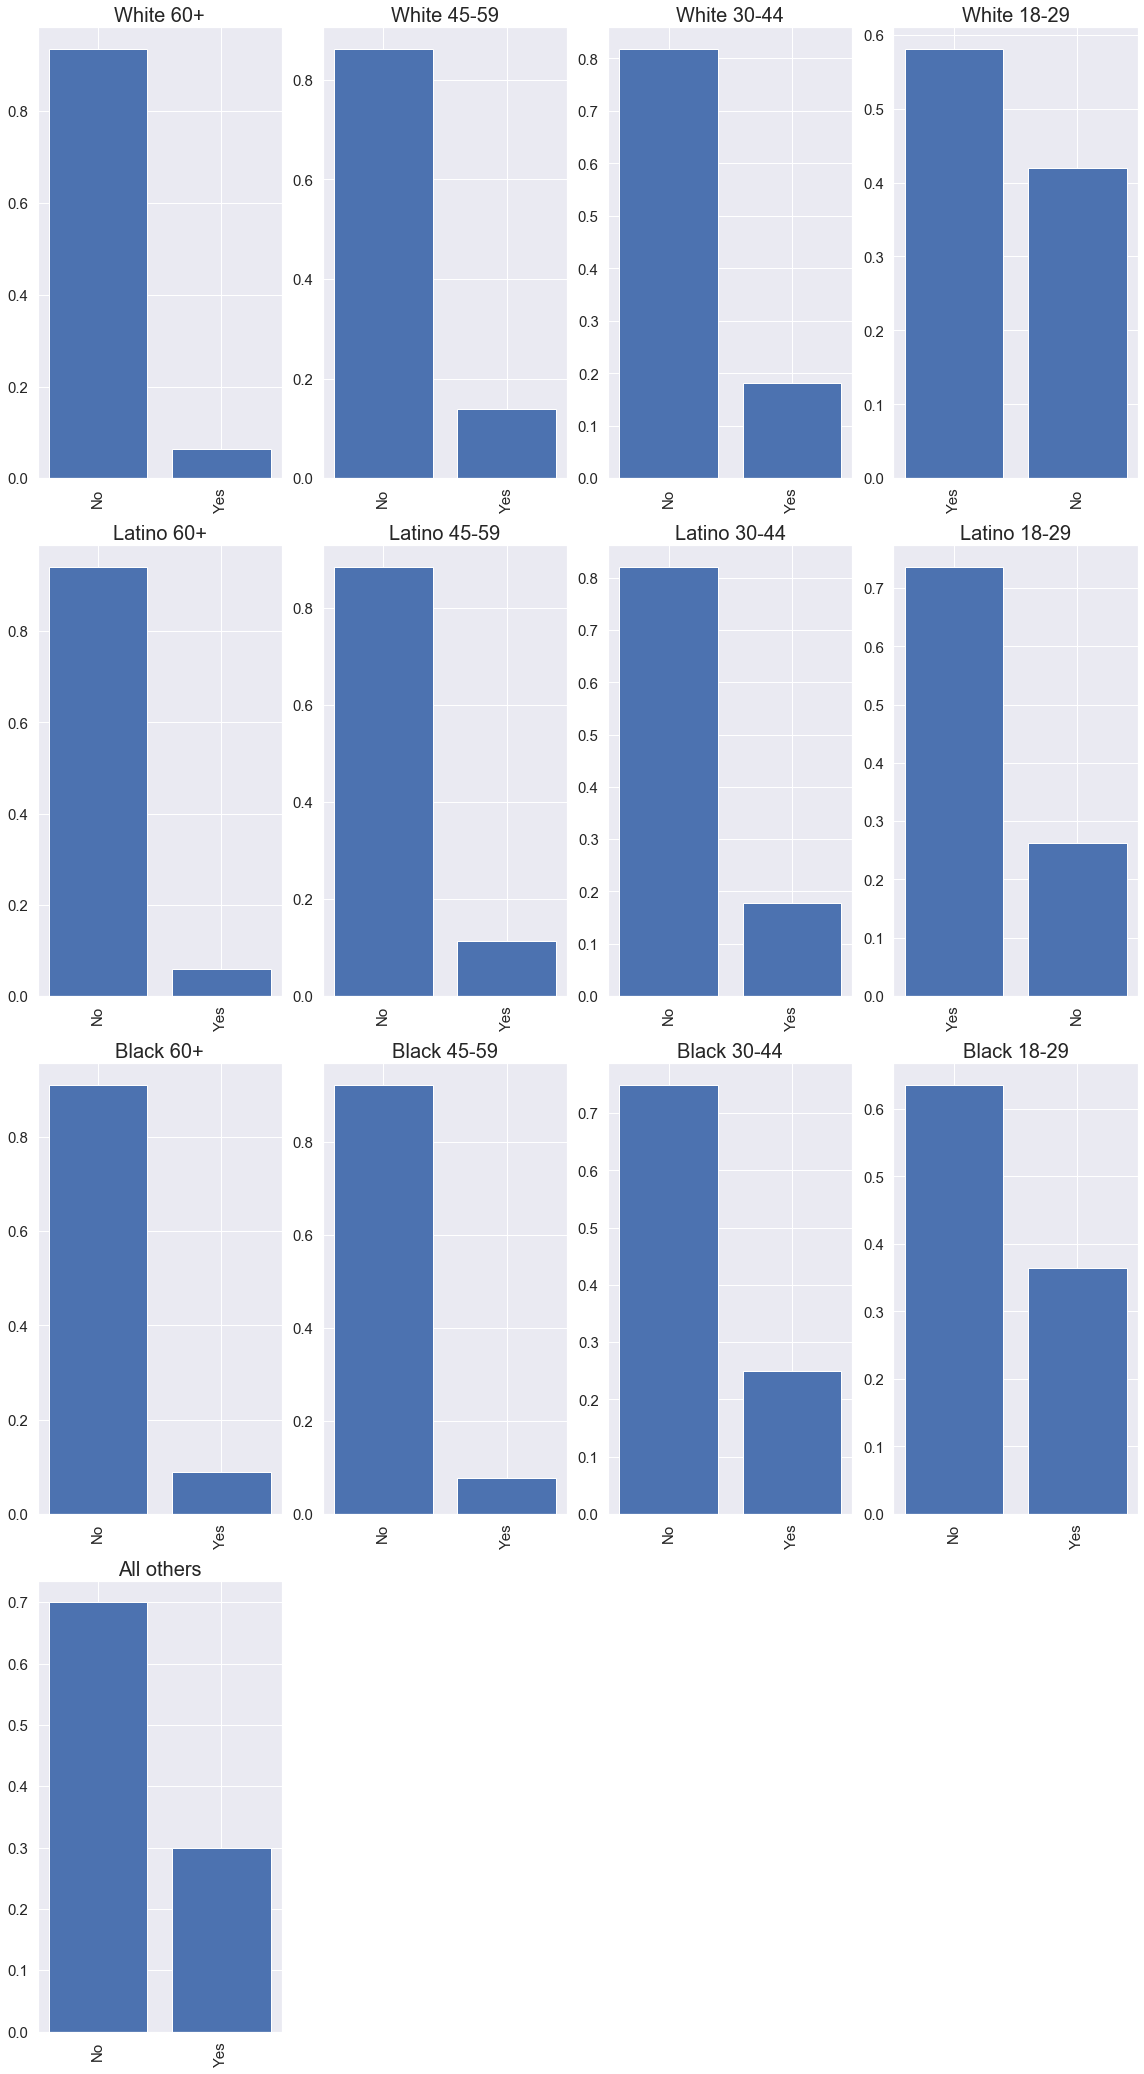

In [218]:
plt.figure(figsize=(16, 50))
for i, g in enumerate(group_age_by_race):
    
    plt.subplot(7, 4, i+1)
    data = df_v1_mod_con_dems[df_v1_mod_con_dems['AGEBYRACE']==g]['FTVOTER18'].value_counts(normalize=True)
    plt.bar(x=data.index, height=data)
    plt.xticks(rotation=90)
    plt.title(g, fontdict={'fontsize': 20})
    plt.tick_params(axis='x', which='major', labelsize= 15)
    plt.tick_params(axis='y', labelsize=15)
    plt.tight_layout()

#### Plot that shows who a participant voted for in 2016 and their support of Trump


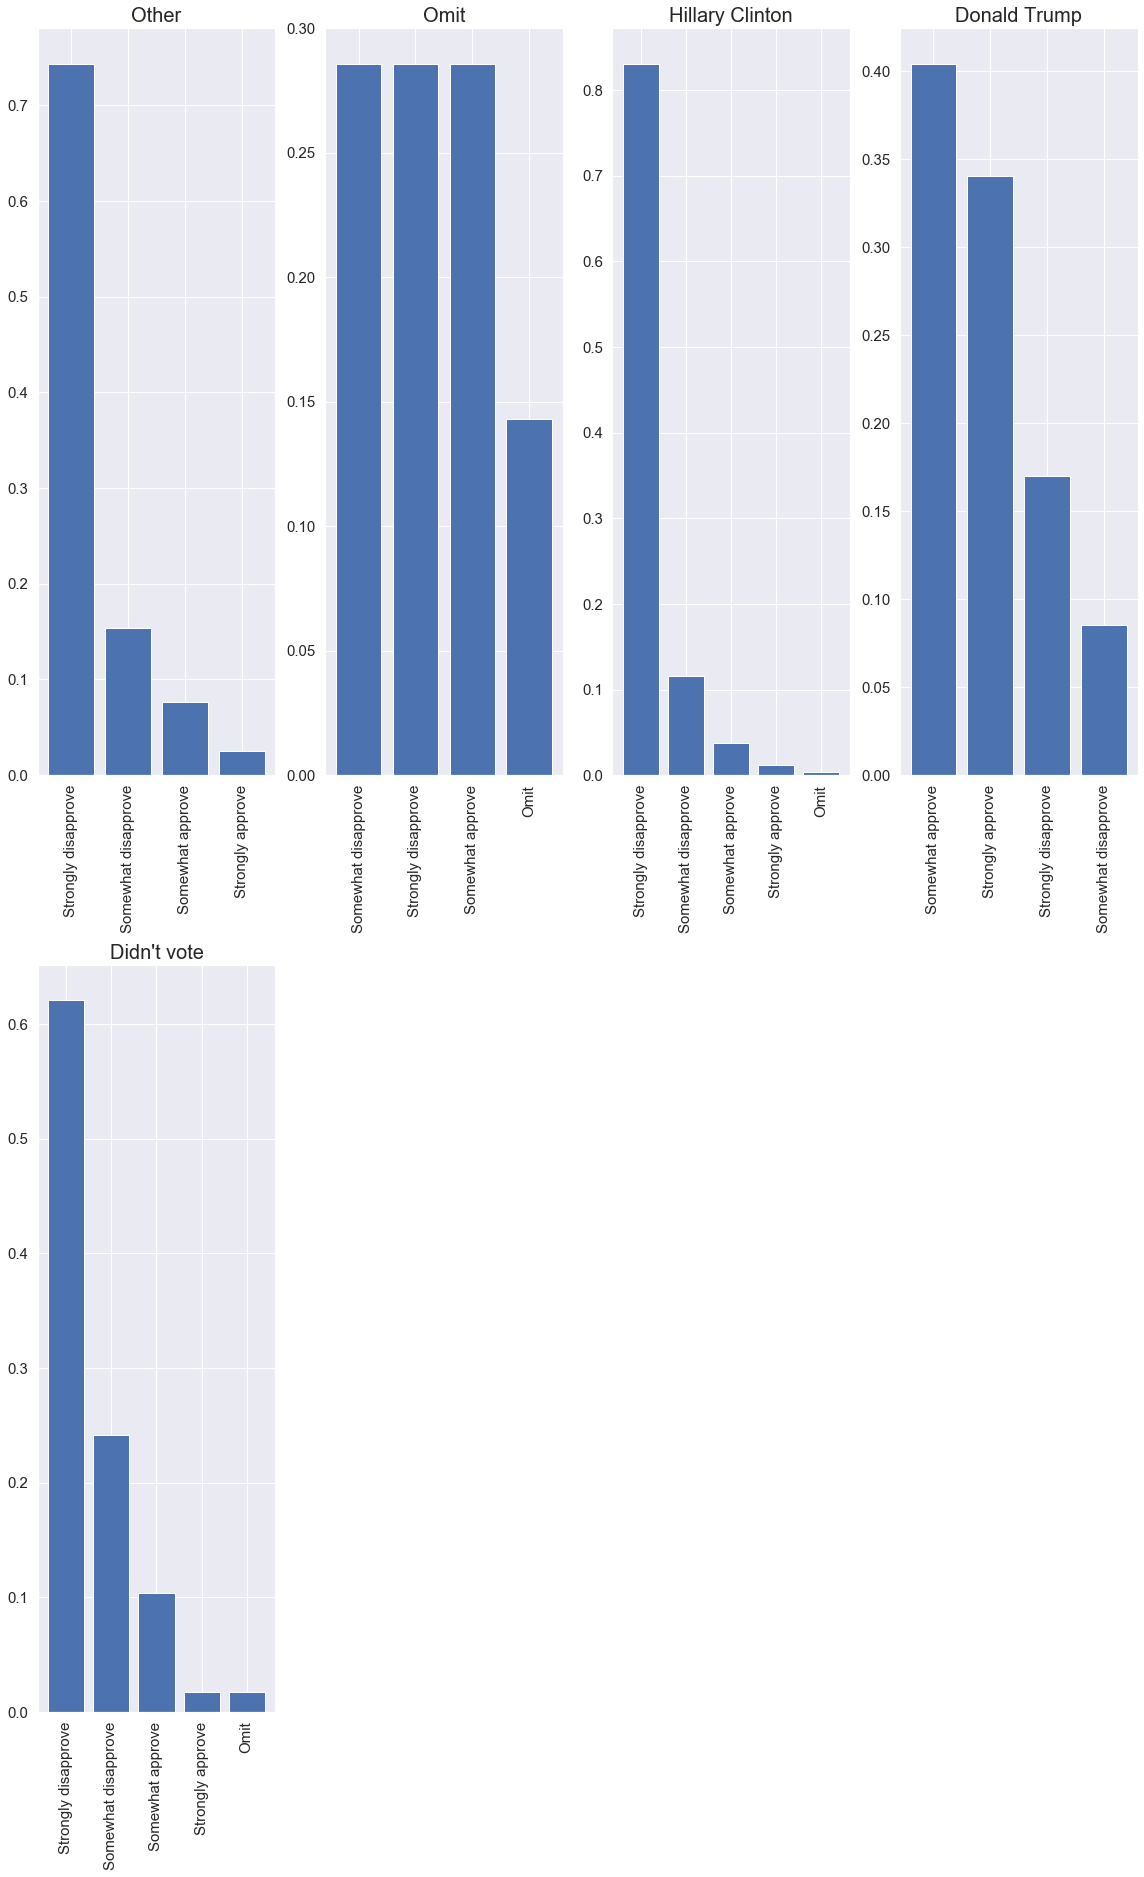

In [219]:
plt.figure(figsize=(16, 50))
for i, g in enumerate(group_vote_2016):
    
    plt.subplot(4, 4, i+1)
    data = df_v1_mod_con_dems[df_v1_mod_con_dems['VOTE2016']==g]['TRUMP4'].value_counts(normalize=True)
    plt.bar(x=data.index, height=data)
    plt.xticks(rotation=90)
    plt.title(g, fontdict={'fontsize': 20})
    plt.tick_params(axis='x', which='major', labelsize= 15)
    plt.tick_params(axis='y', labelsize=15)
    plt.tight_layout()

In [ ]:
# Insights: Out of those who didn't vote in 2016 how many were between the ages of 18-29 
# Insights: Donald Trump Approval and disapproval 

### Liberal Independents 

In [229]:
df_v1_lib_ind = df_v1[df_v1['PTYIDEO7'] == 'Liberal Independents']


#### Plot that shows AGEBYRACE and who the person voted for in 2016 

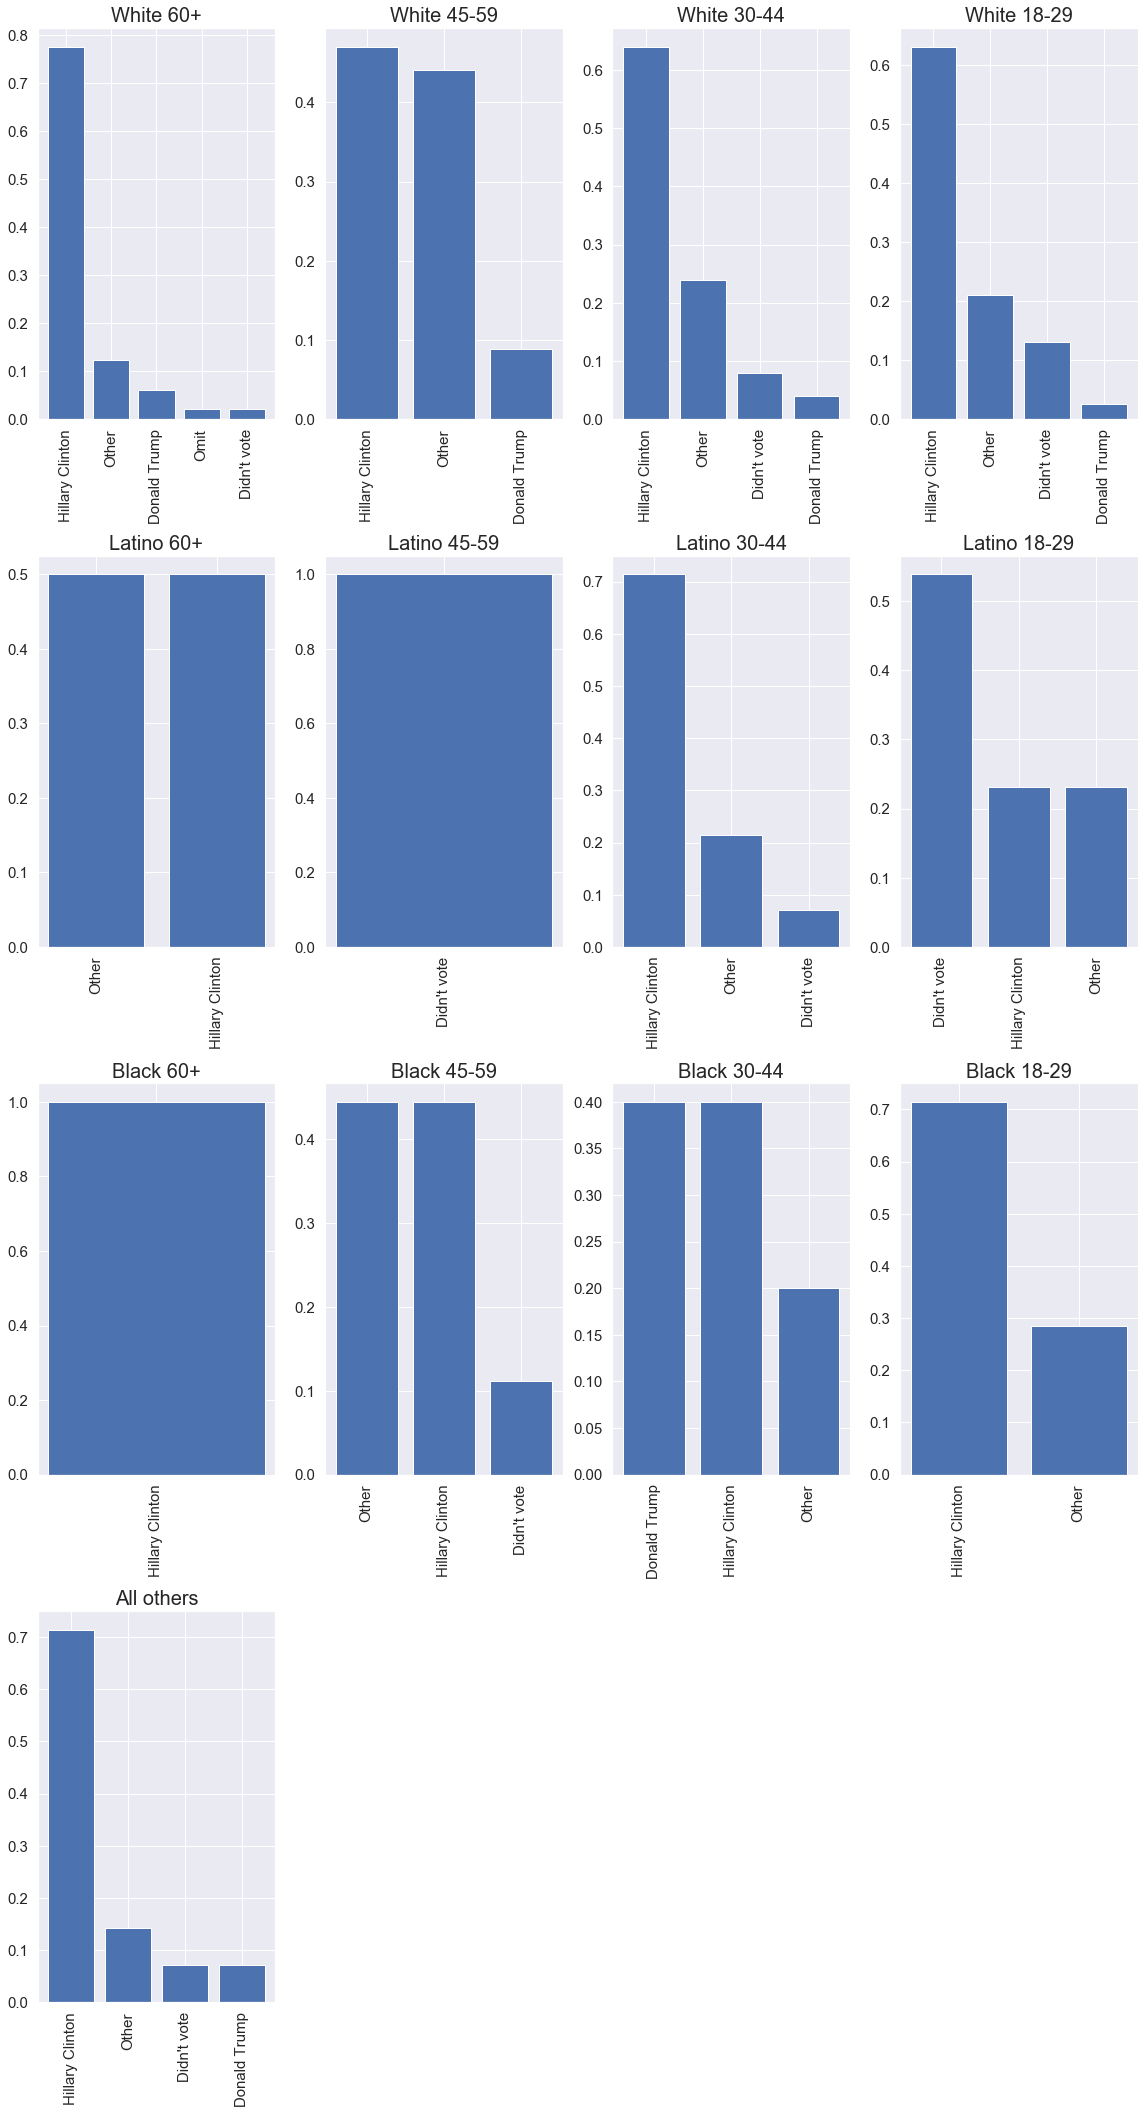

In [225]:
plt.figure(figsize=(16, 50))
for i, g in enumerate(group_age_by_race):
    
    plt.subplot(7, 4, i+1)
    data = df_v1_lib_ind[df_v1_lib_ind['AGEBYRACE']==g]['VOTE2016'].value_counts(normalize=True)
    plt.bar(x=data.index, height=data)
    plt.xticks(rotation=90)
    plt.title(g, fontdict={'fontsize': 20})
    plt.tick_params(axis='x', which='major', labelsize= 15)
    plt.tick_params(axis='y', labelsize=15)
    plt.tight_layout()

#### Plot that shows AGEBYRACE and whether or not the participant was a first time voter 

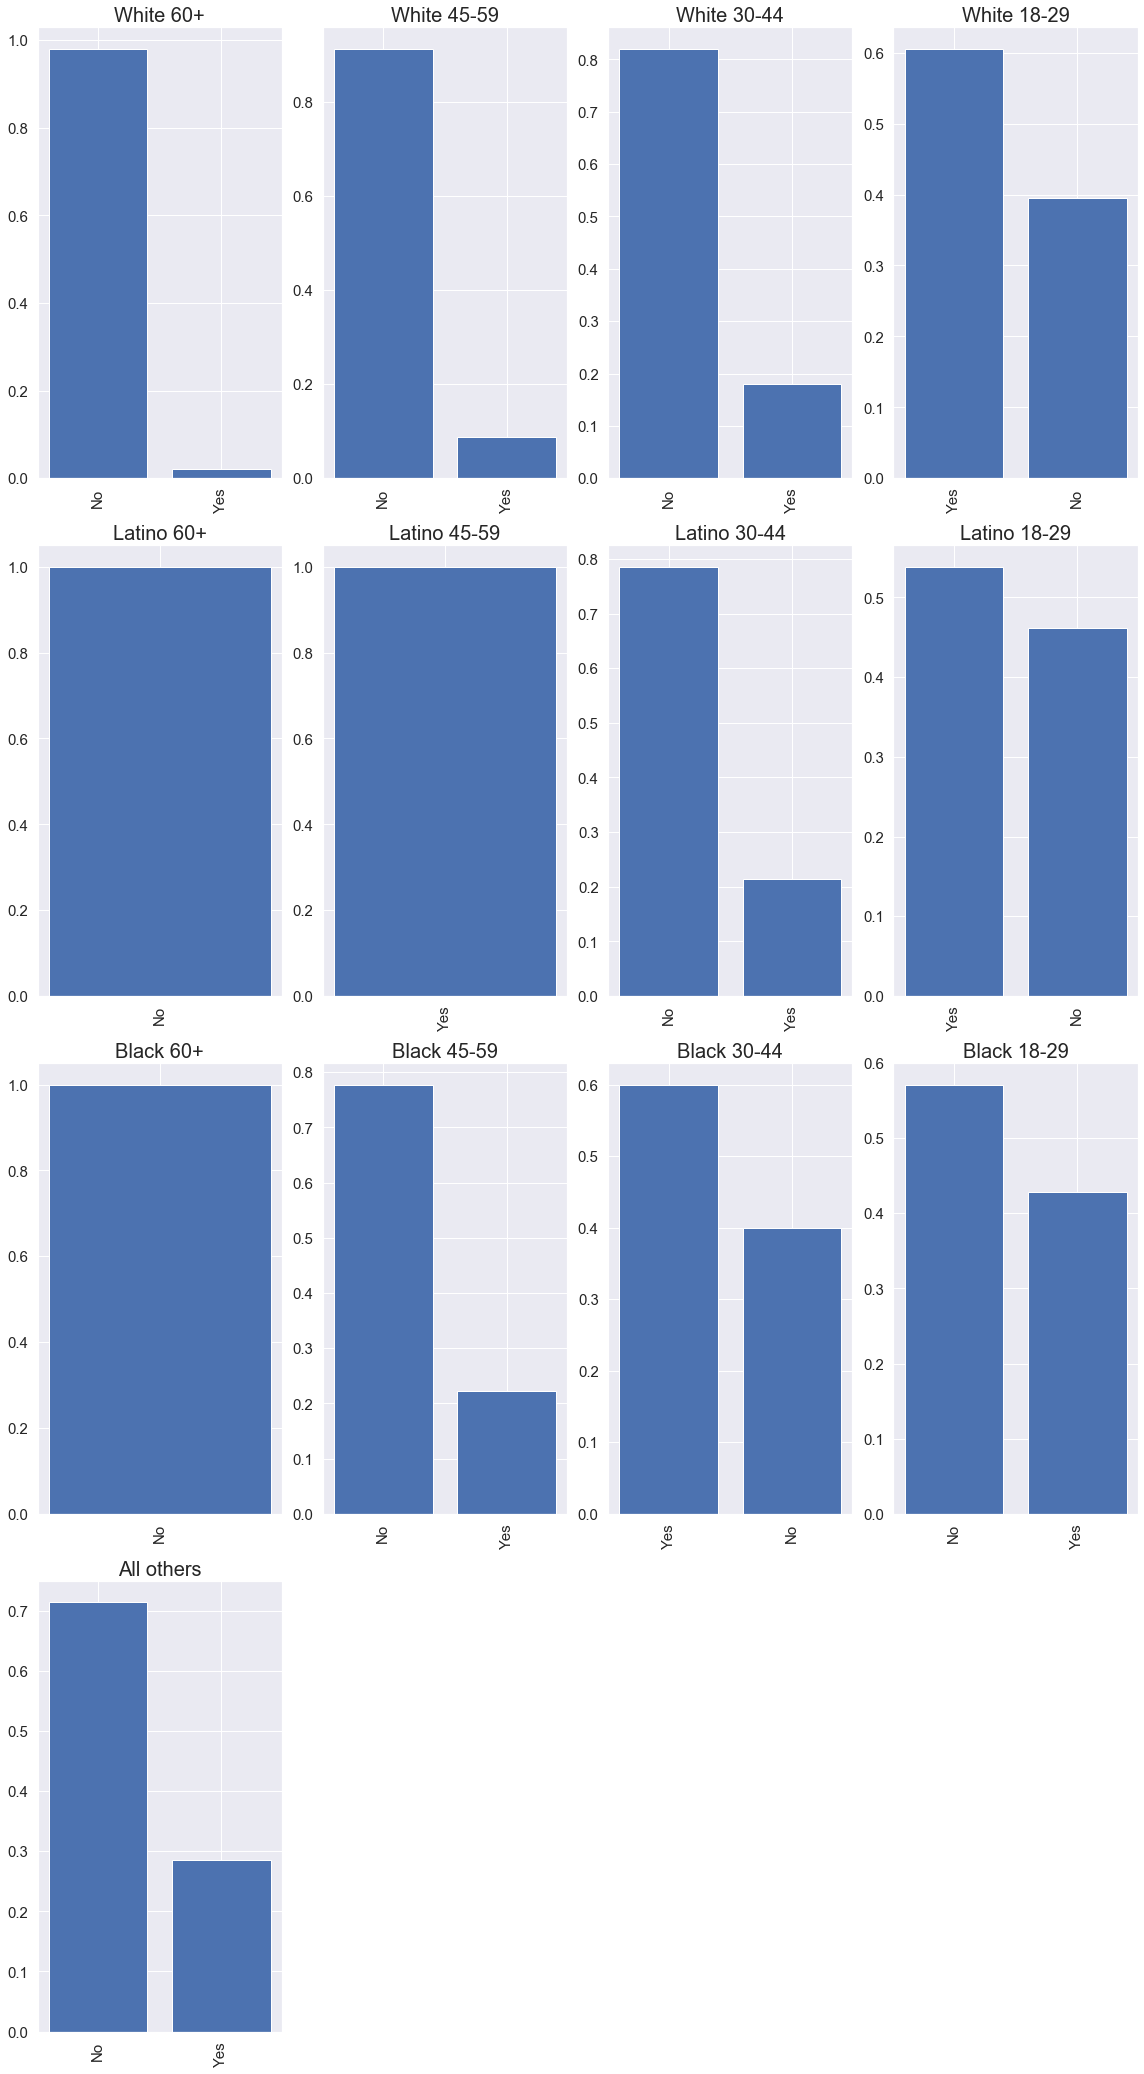

In [226]:
plt.figure(figsize=(16, 50))
for i, g in enumerate(group_age_by_race):
    
    plt.subplot(7, 4, i+1)
    data = df_v1_lib_ind[df_v1_lib_ind['AGEBYRACE']==g]['FTVOTER18'].value_counts(normalize=True)
    plt.bar(x=data.index, height=data)
    plt.xticks(rotation=90)
    plt.title(g, fontdict={'fontsize': 20})
    plt.tick_params(axis='x', which='major', labelsize= 15)
    plt.tick_params(axis='y', labelsize=15)
    plt.tight_layout()

#### Plot that shows who a participant voted for in 2016 and their support of Trump


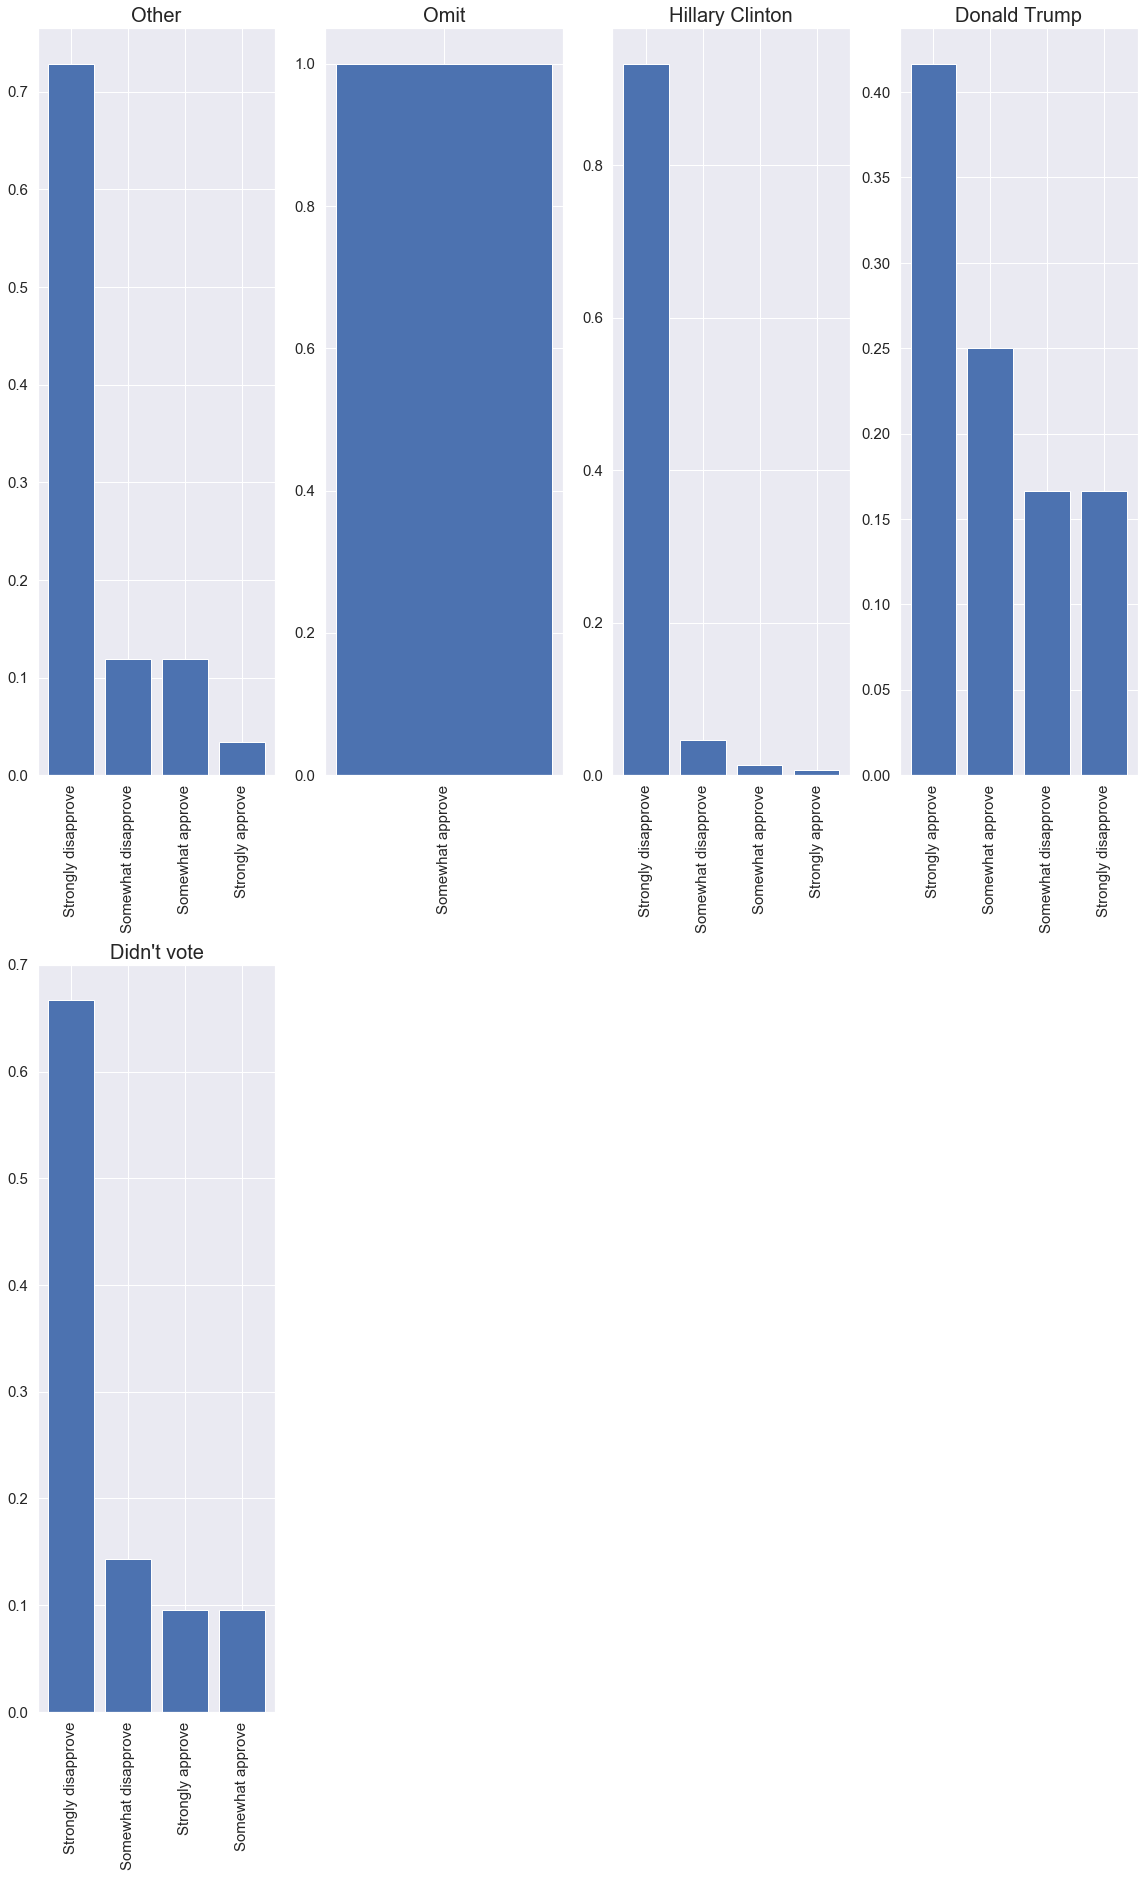

In [227]:
plt.figure(figsize=(16, 50))
for i, g in enumerate(group_vote_2016):
    
    plt.subplot(4, 4, i+1)
    data = df_v1_lib_ind[df_v1_lib_ind['VOTE2016']==g]['TRUMP4'].value_counts(normalize=True)
    plt.bar(x=data.index, height=data)
    plt.xticks(rotation=90)
    plt.title(g, fontdict={'fontsize': 20})
    plt.tick_params(axis='x', which='major', labelsize= 15)
    plt.tick_params(axis='y', labelsize=15)
    plt.tight_layout()

### Moderate/Liberal Republicans 

In [283]:
df_v1_mod_lib_rep = df_v1[df_v1['PTYIDEO7'] == 'Mod./Liberal Republicans']

#### Plot that shows AGEBYRACE and who the person voted for in 2016 


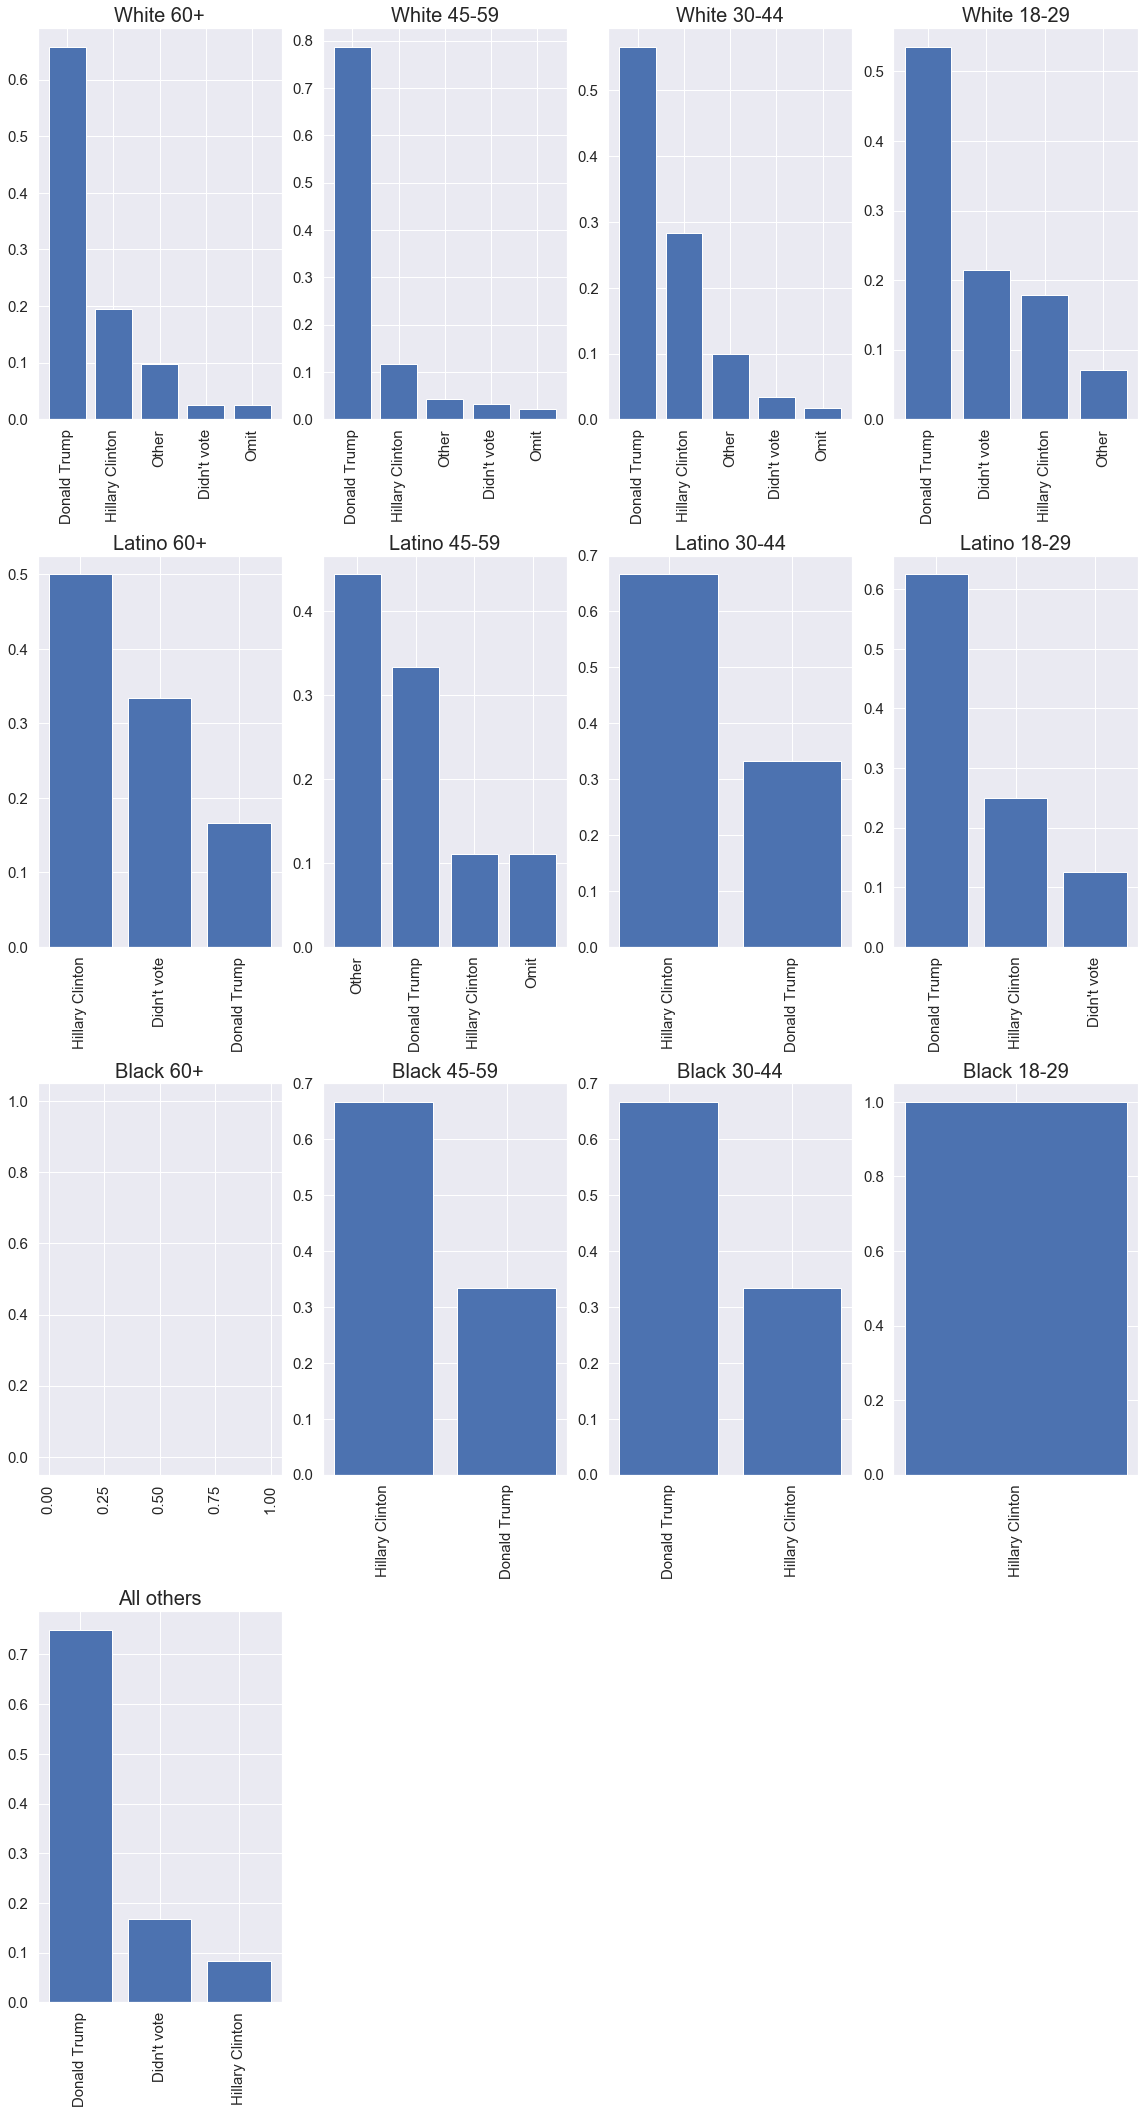

In [238]:
plt.figure(figsize=(16, 50))
for i, g in enumerate(group_age_by_race):
    
    plt.subplot(7, 4, i+1)
    data = df_v1_mod_lib_rep[df_v1_mod_lib_rep['AGEBYRACE']==g]['VOTE2016'].value_counts(normalize=True)
    plt.bar(x=data.index, height=data)
    plt.xticks(rotation=90)
    plt.title(g, fontdict={'fontsize': 20})
    plt.tick_params(axis='x', which='major', labelsize= 15)
    plt.tick_params(axis='y', labelsize=15)
    plt.tight_layout()

#### Plot that shows AGEBYRACE and whether or not the participant was a first time voter 

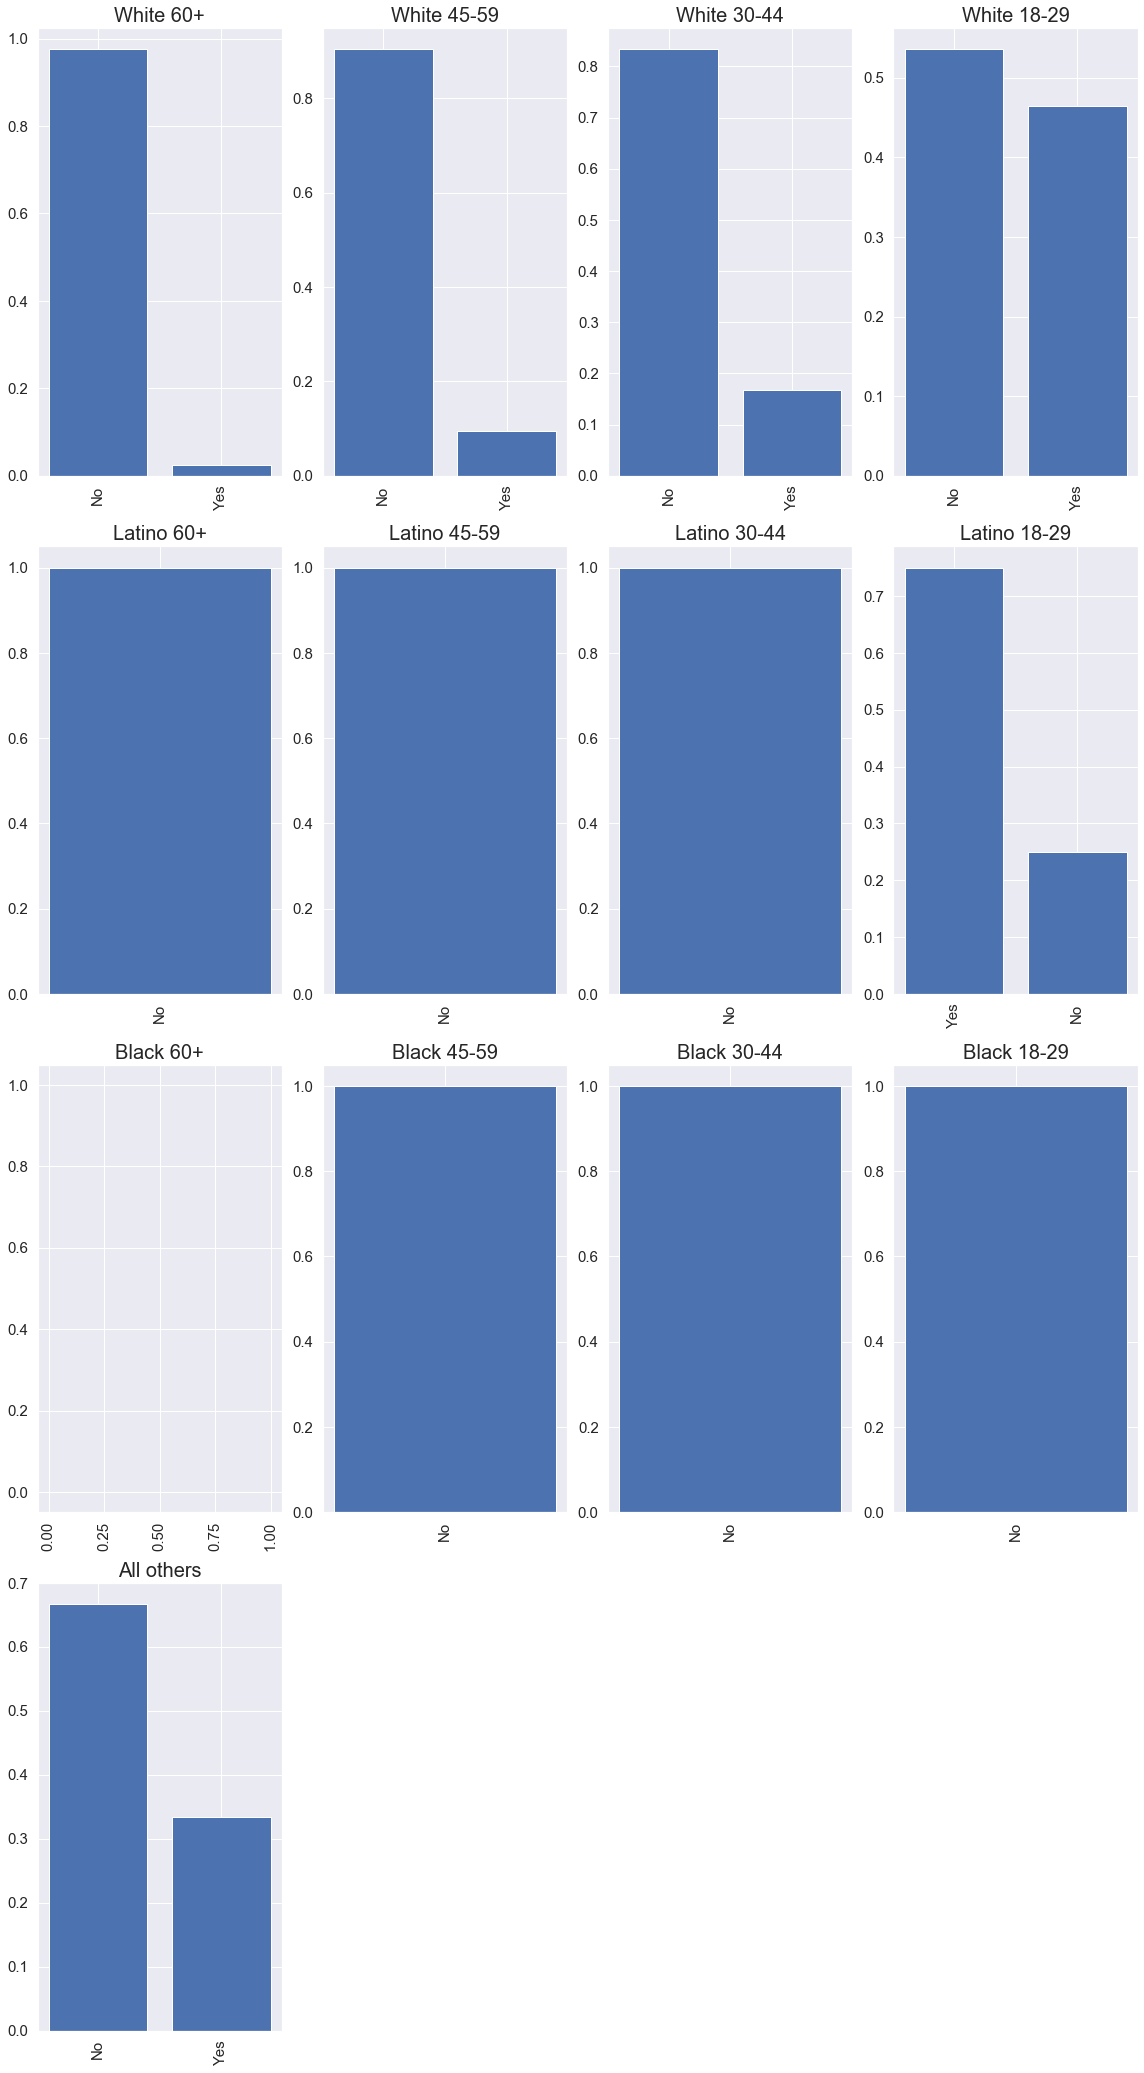

In [239]:
plt.figure(figsize=(16, 50))
for i, g in enumerate(group_age_by_race):
    
    plt.subplot(7, 4, i+1)
    data = df_v1_mod_lib_rep[df_v1_mod_lib_rep['AGEBYRACE']==g]['FTVOTER18'].value_counts(normalize=True)
    plt.bar(x=data.index, height=data)
    plt.xticks(rotation=90)
    plt.title(g, fontdict={'fontsize': 20})
    plt.tick_params(axis='x', which='major', labelsize= 15)
    plt.tick_params(axis='y', labelsize=15)
    plt.tight_layout()

#### Plot that shows who a participant voted for in 2016 and their support of Trump

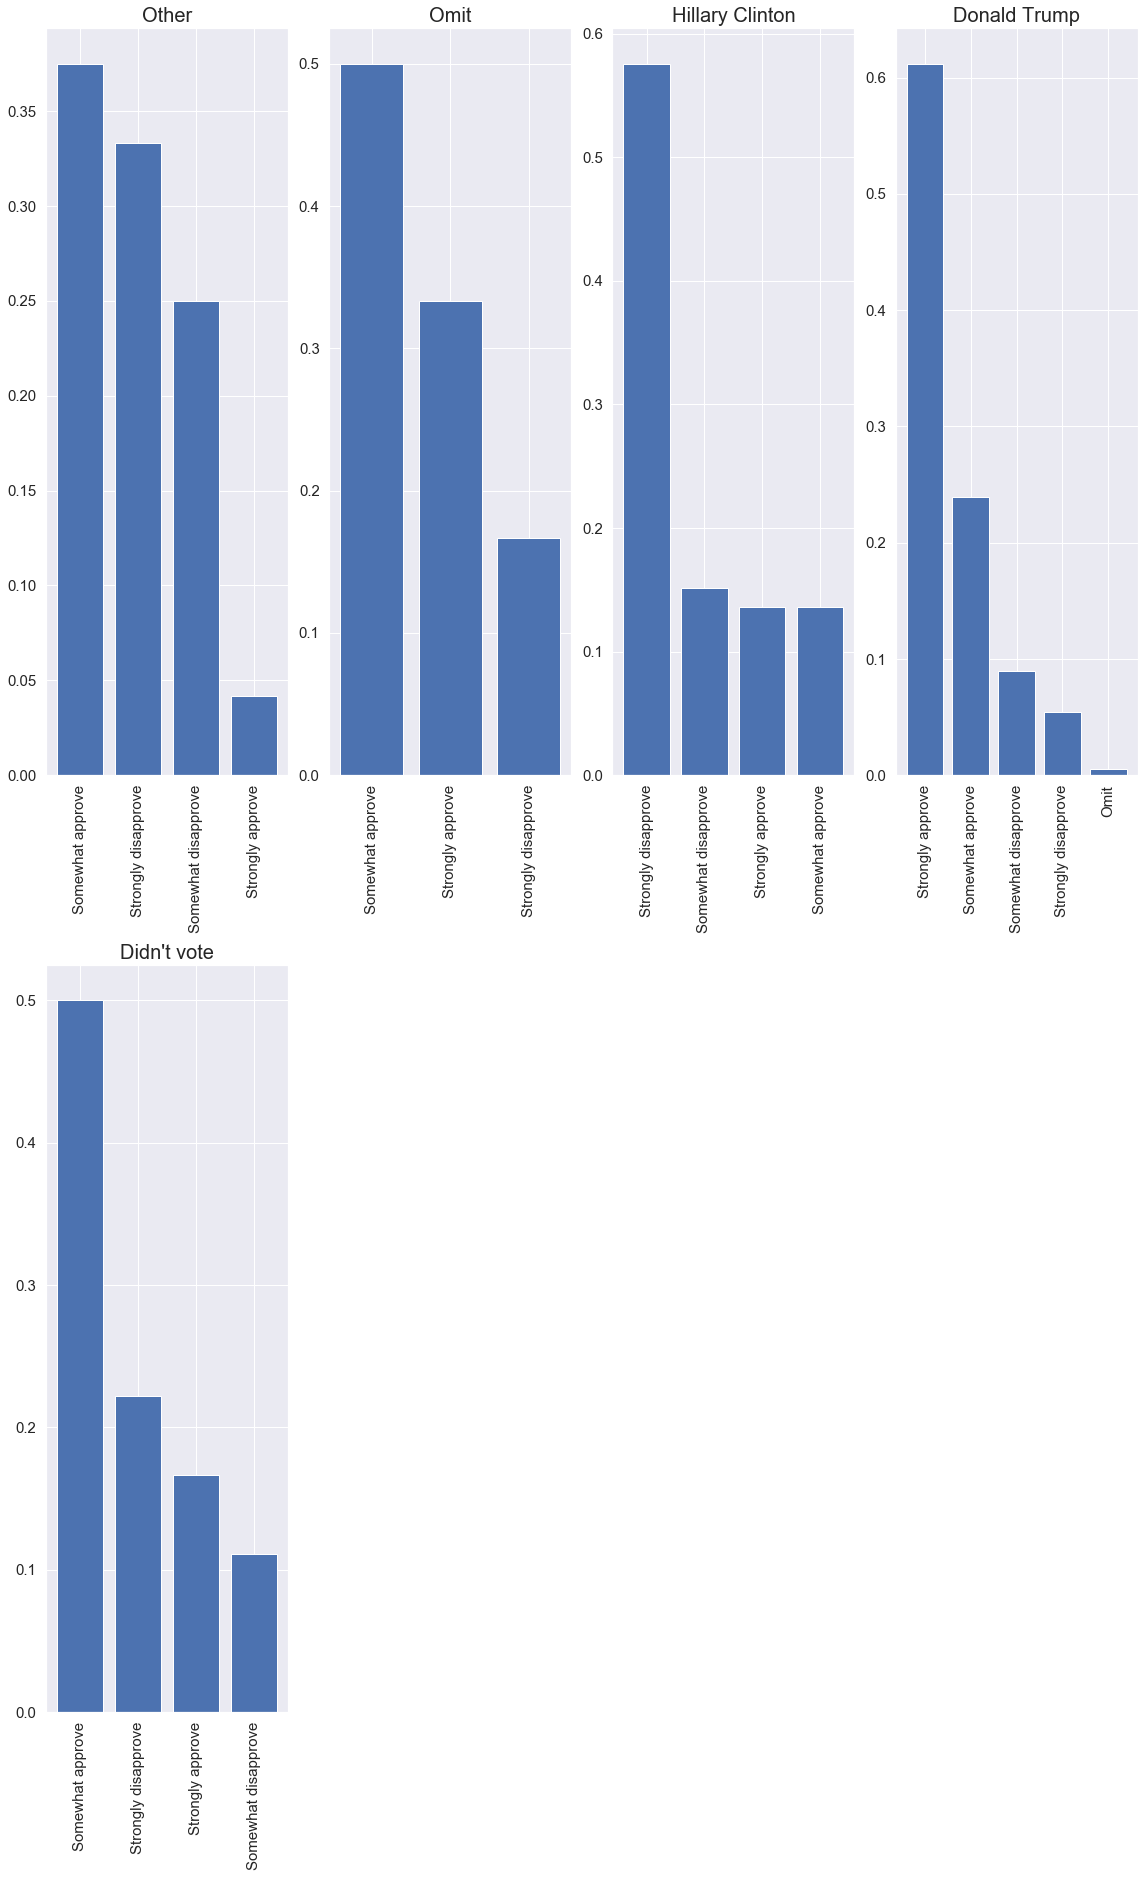

In [240]:
plt.figure(figsize=(16, 50))
for i, g in enumerate(group_vote_2016):
    
    plt.subplot(4, 4, i+1)
    data = df_v1_mod_lib_rep[df_v1_mod_lib_rep['VOTE2016']==g]['TRUMP4'].value_counts(normalize=True)
    plt.bar(x=data.index, height=data)
    plt.xticks(rotation=90)
    plt.title(g, fontdict={'fontsize': 20})
    plt.tick_params(axis='x', which='major', labelsize= 15)
    plt.tick_params(axis='y', labelsize=15)
    plt.tight_layout()

### Conservative Republicans 

In [284]:
df_v1_con_reps = df_v1[df_v1['PTYIDEO7'] == 'Conservative Republicans']

#### Plot that shows AGEBYRACE and who the person voted for in 2016

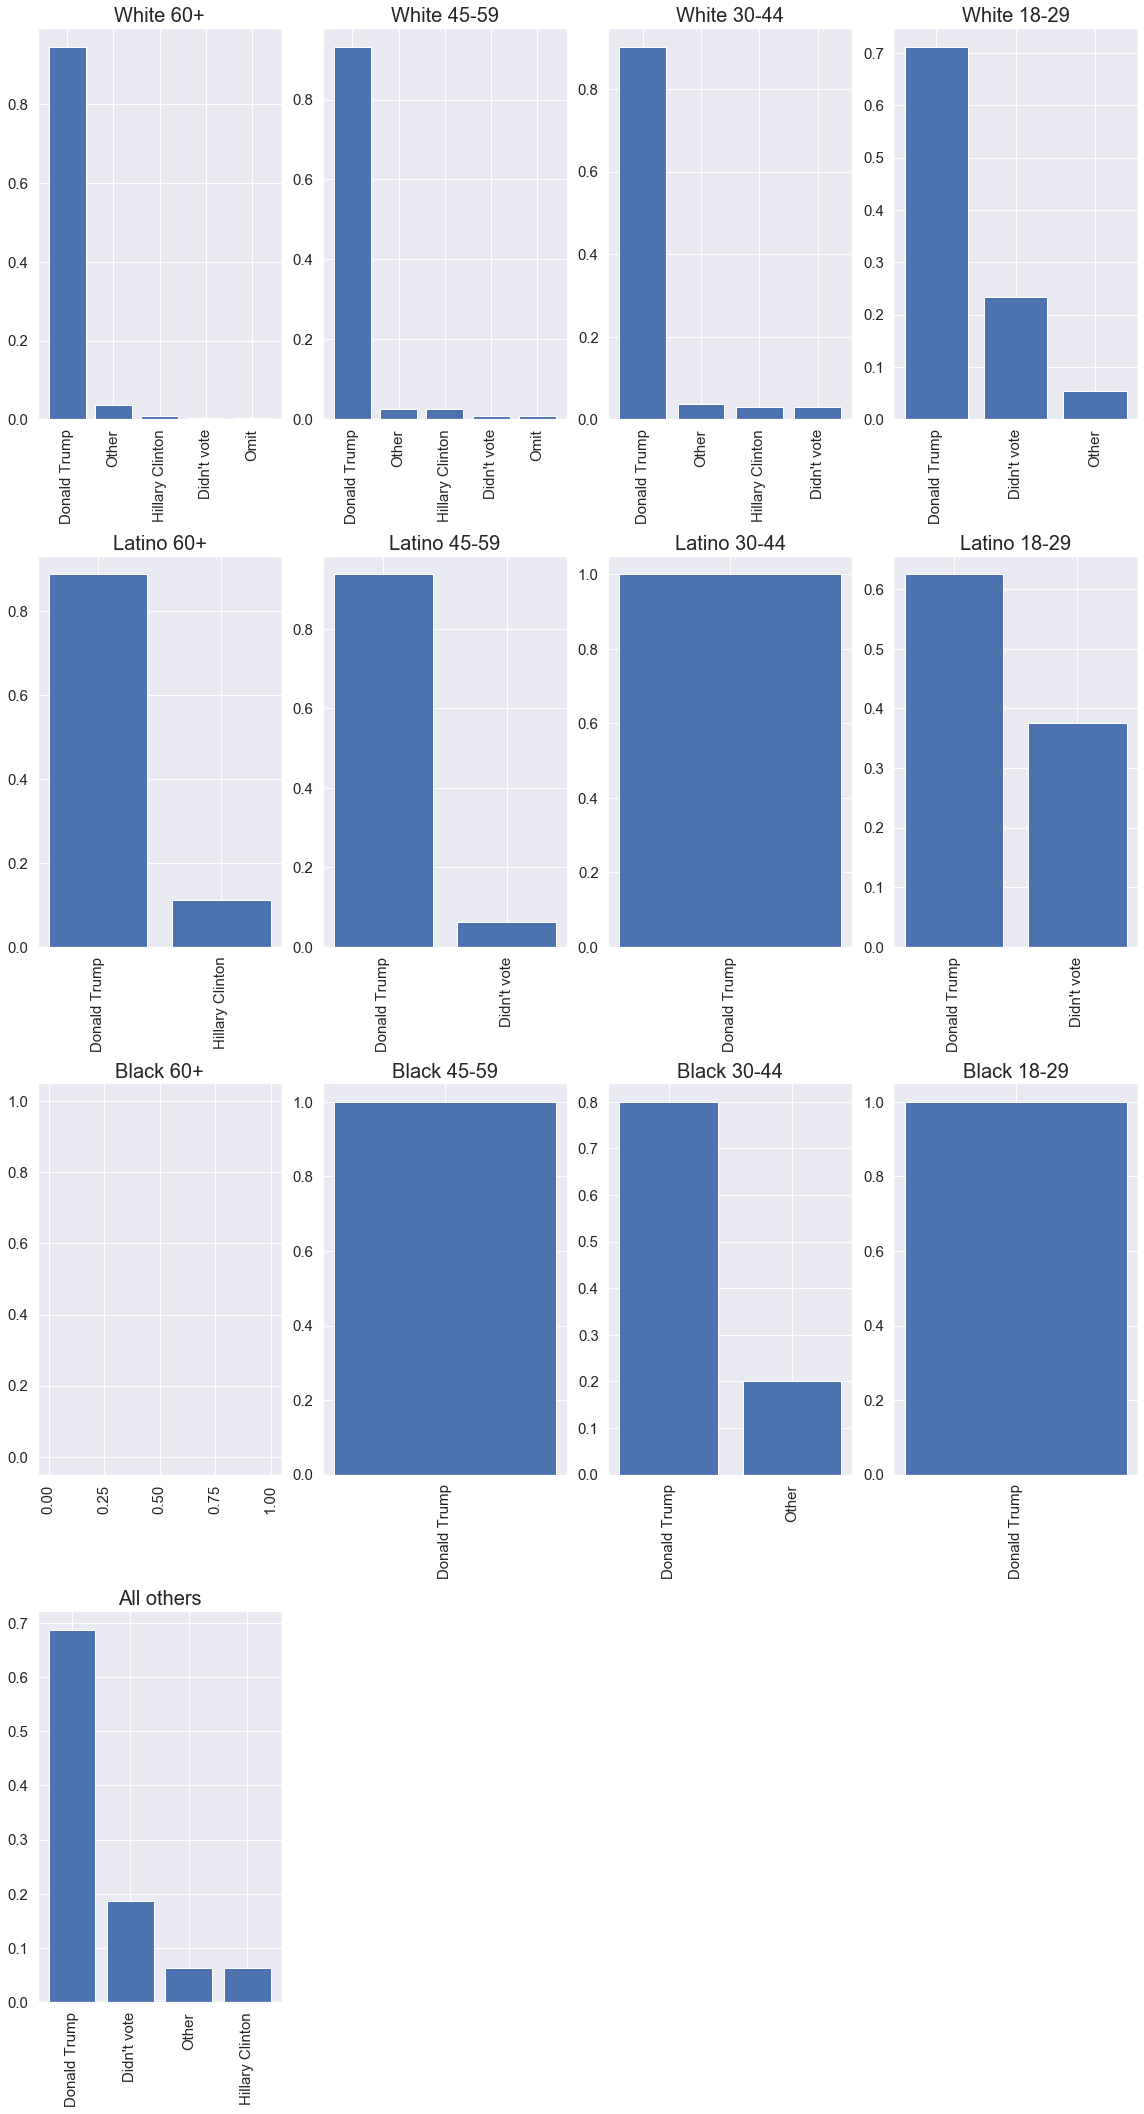

In [242]:
plt.figure(figsize=(16, 50))
for i, g in enumerate(group_age_by_race):
    
    plt.subplot(7, 4, i+1)
    data = df_v1_con_reps[df_v1_con_reps['AGEBYRACE']==g]['VOTE2016'].value_counts(normalize=True)
    plt.bar(x=data.index, height=data)
    plt.xticks(rotation=90)
    plt.title(g, fontdict={'fontsize': 20})
    plt.tick_params(axis='x', which='major', labelsize= 15)
    plt.tick_params(axis='y', labelsize=15)
    plt.tight_layout()

#### Plot that shows AGEBYRACE and whether or not the participant was a first time voter 

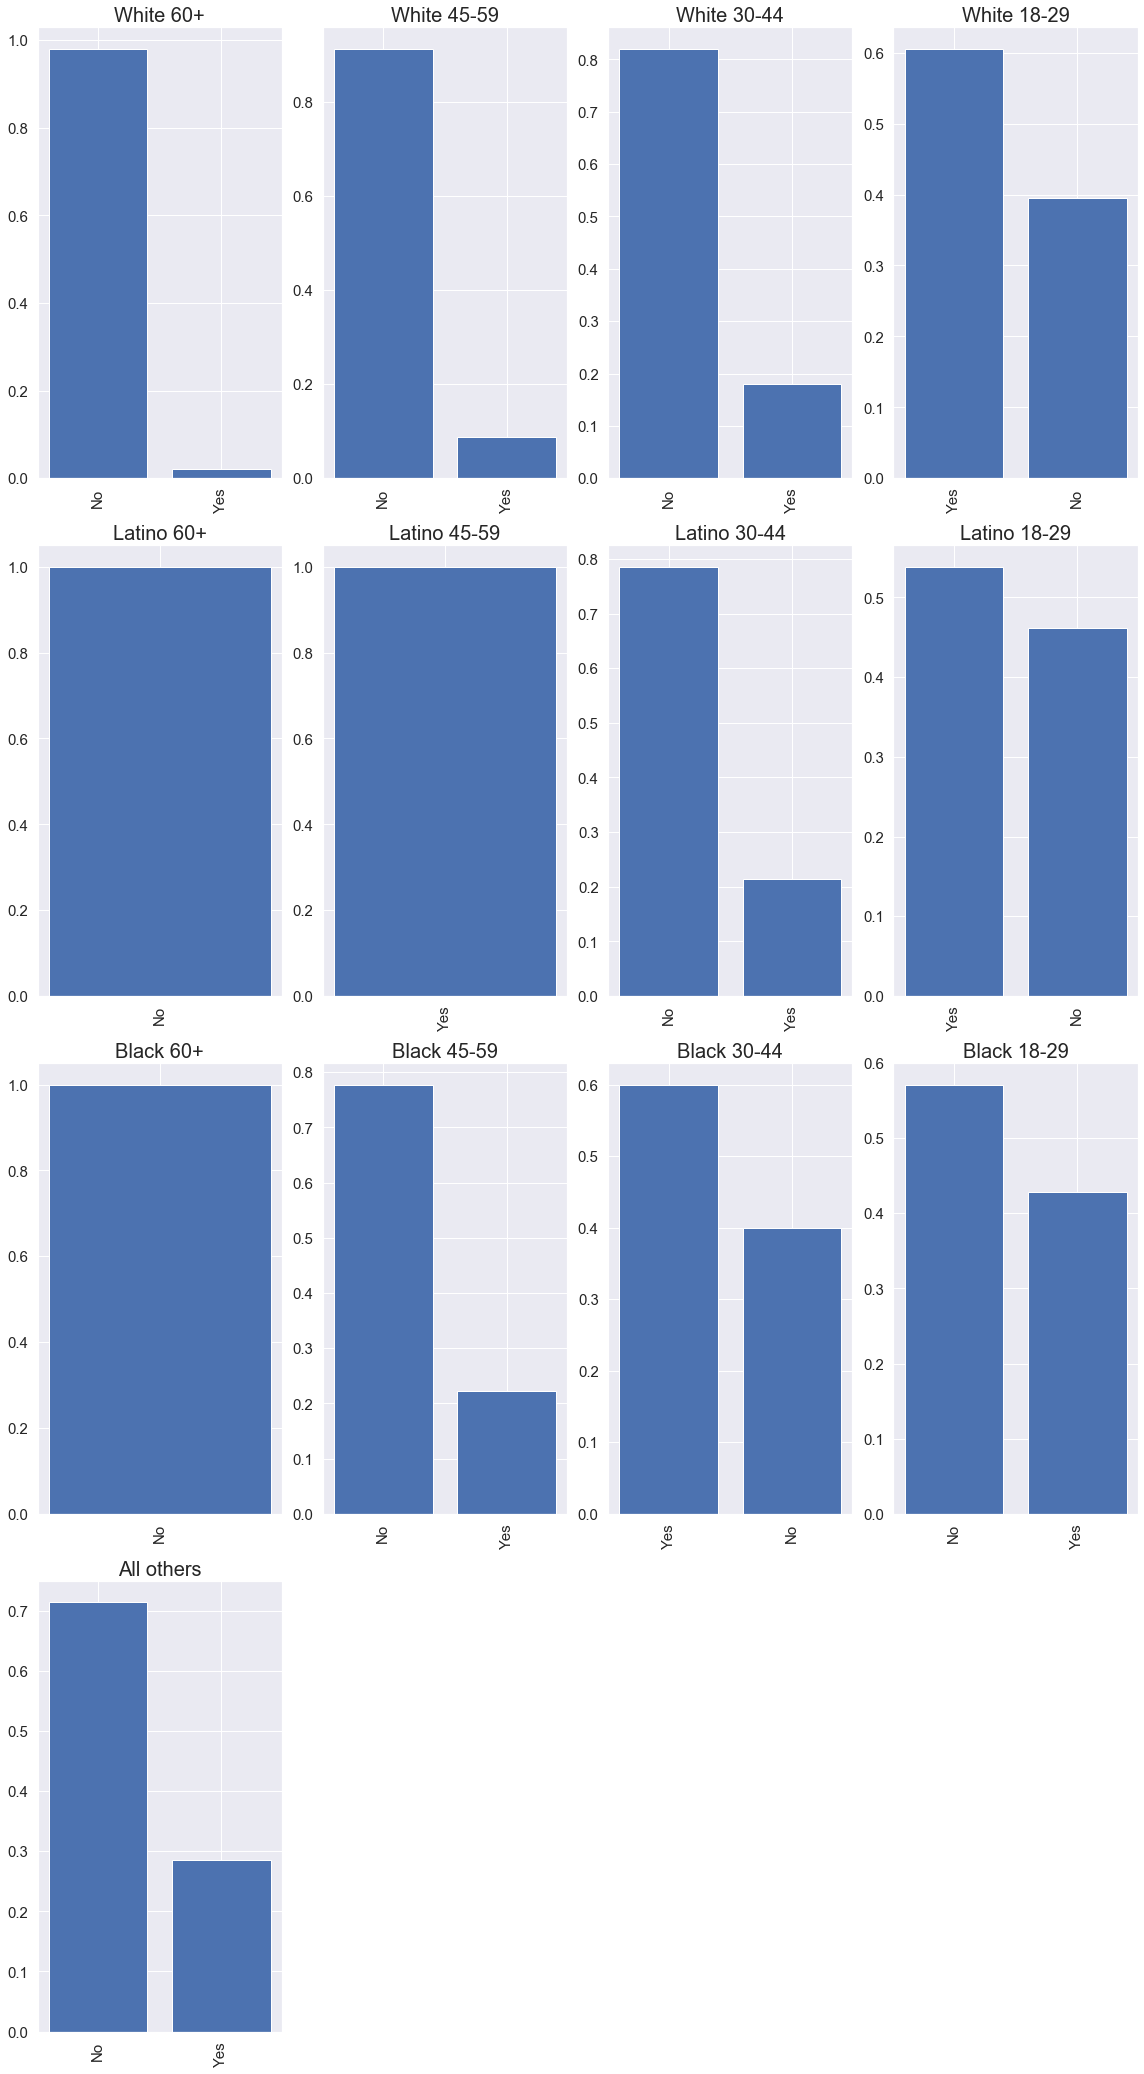

In [243]:
plt.figure(figsize=(16, 50))
for i, g in enumerate(group_age_by_race):
    
    plt.subplot(7, 4, i+1)
    data = df_v1_lib_ind[df_v1_lib_ind['AGEBYRACE']==g]['FTVOTER18'].value_counts(normalize=True)
    plt.bar(x=data.index, height=data)
    plt.xticks(rotation=90)
    plt.title(g, fontdict={'fontsize': 20})
    plt.tick_params(axis='x', which='major', labelsize= 15)
    plt.tick_params(axis='y', labelsize=15)
    plt.tight_layout()

#### Plot that shows who a participant voted for in 2016 and their support of Trump

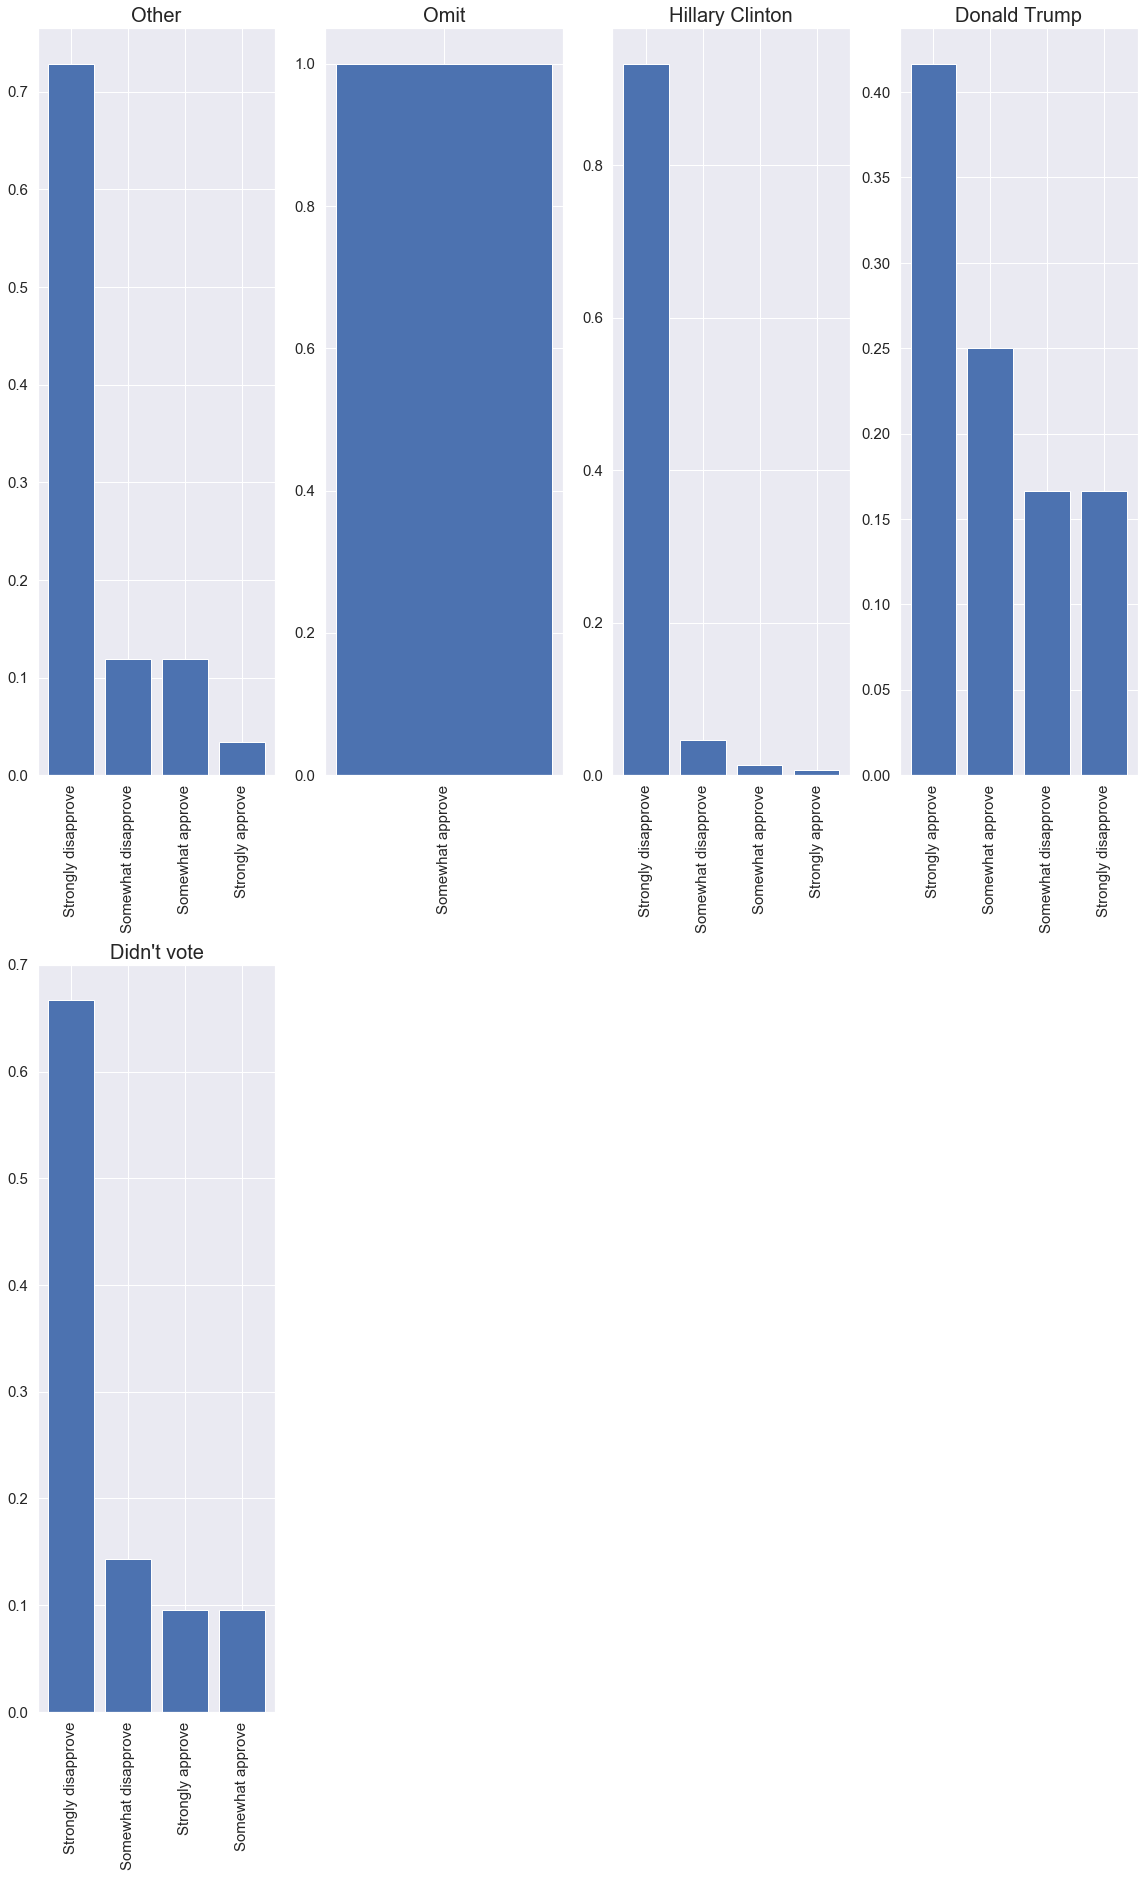

In [244]:
plt.figure(figsize=(16, 50))
for i, g in enumerate(group_vote_2016):
    
    plt.subplot(4, 4, i+1)
    data = df_v1_lib_ind[df_v1_lib_ind['VOTE2016']==g]['TRUMP4'].value_counts(normalize=True)
    plt.bar(x=data.index, height=data)
    plt.xticks(rotation=90)
    plt.title(g, fontdict={'fontsize': 20})
    plt.tick_params(axis='x', which='major', labelsize= 15)
    plt.tick_params(axis='y', labelsize=15)
    plt.tight_layout()

### Conservative Independents 

In [251]:
df_v1_con_ind = df_v1[df_v1['PTYIDEO7'] == 'Conservative Independents']

#### Plot that shows AGEBYRACE and who the person voted for in 2016 

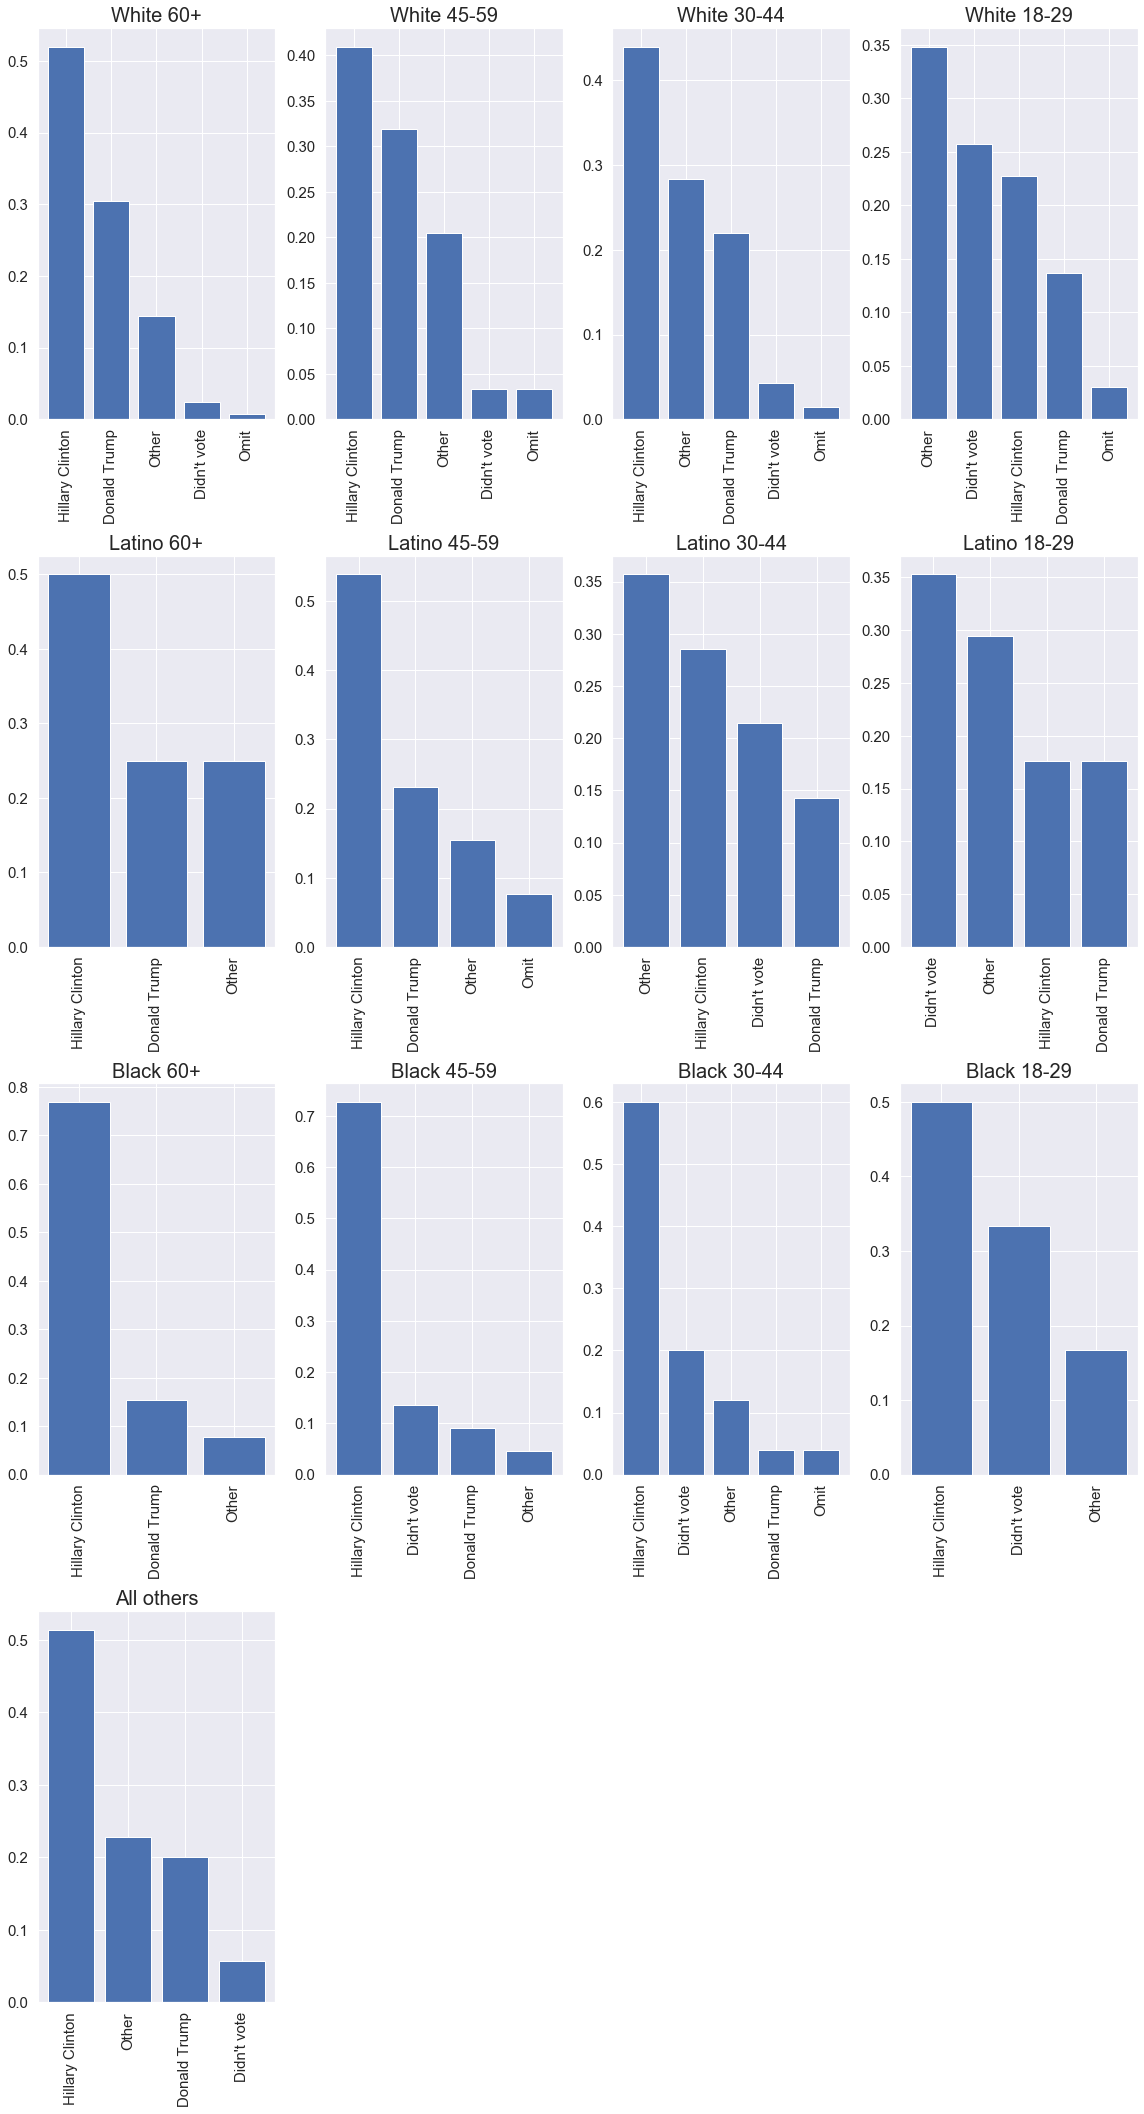

In [246]:
plt.figure(figsize=(16, 50))
for i, g in enumerate(group_age_by_race):
    
    plt.subplot(7, 4, i+1)
    data = df_v1_con_ind[df_v1_con_ind['AGEBYRACE']==g]['VOTE2016'].value_counts(normalize=True)
    plt.bar(x=data.index, height=data)
    plt.xticks(rotation=90)
    plt.title(g, fontdict={'fontsize': 20})
    plt.tick_params(axis='x', which='major', labelsize= 15)
    plt.tick_params(axis='y', labelsize=15)
    plt.tight_layout()

#### Plot that shows AGEBYRACE and whether or not the participant was a first time voter 

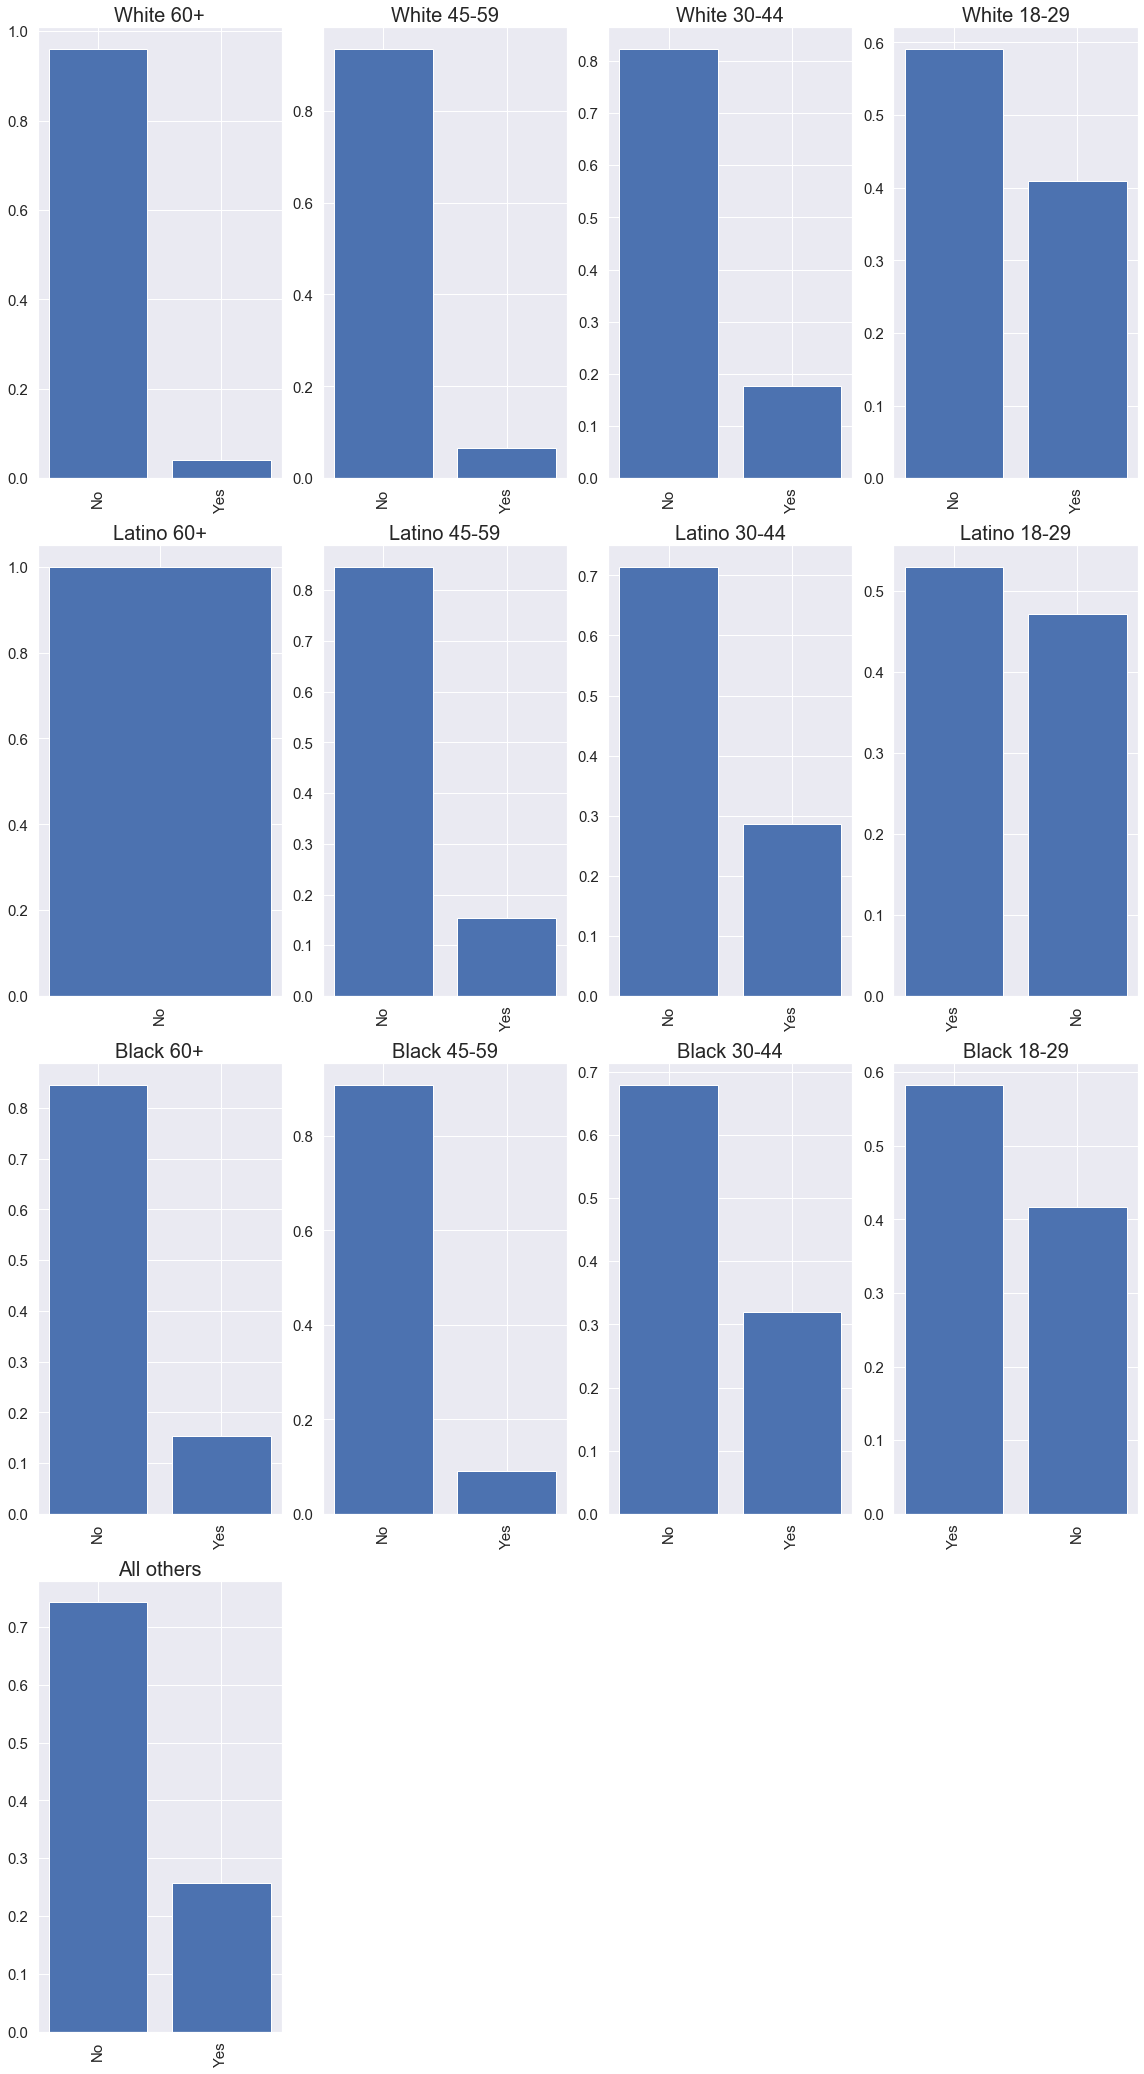

In [247]:
plt.figure(figsize=(16, 50))
for i, g in enumerate(group_age_by_race):
    
    plt.subplot(7, 4, i+1)
    data = df_v1_con_ind[df_v1_con_ind['AGEBYRACE']==g]['FTVOTER18'].value_counts(normalize=True)
    plt.bar(x=data.index, height=data)
    plt.xticks(rotation=90)
    plt.title(g, fontdict={'fontsize': 20})
    plt.tick_params(axis='x', which='major', labelsize= 15)
    plt.tick_params(axis='y', labelsize=15)
    plt.tight_layout()


#### Plot that shows who a participant voted for in 2016 and their support of Trump

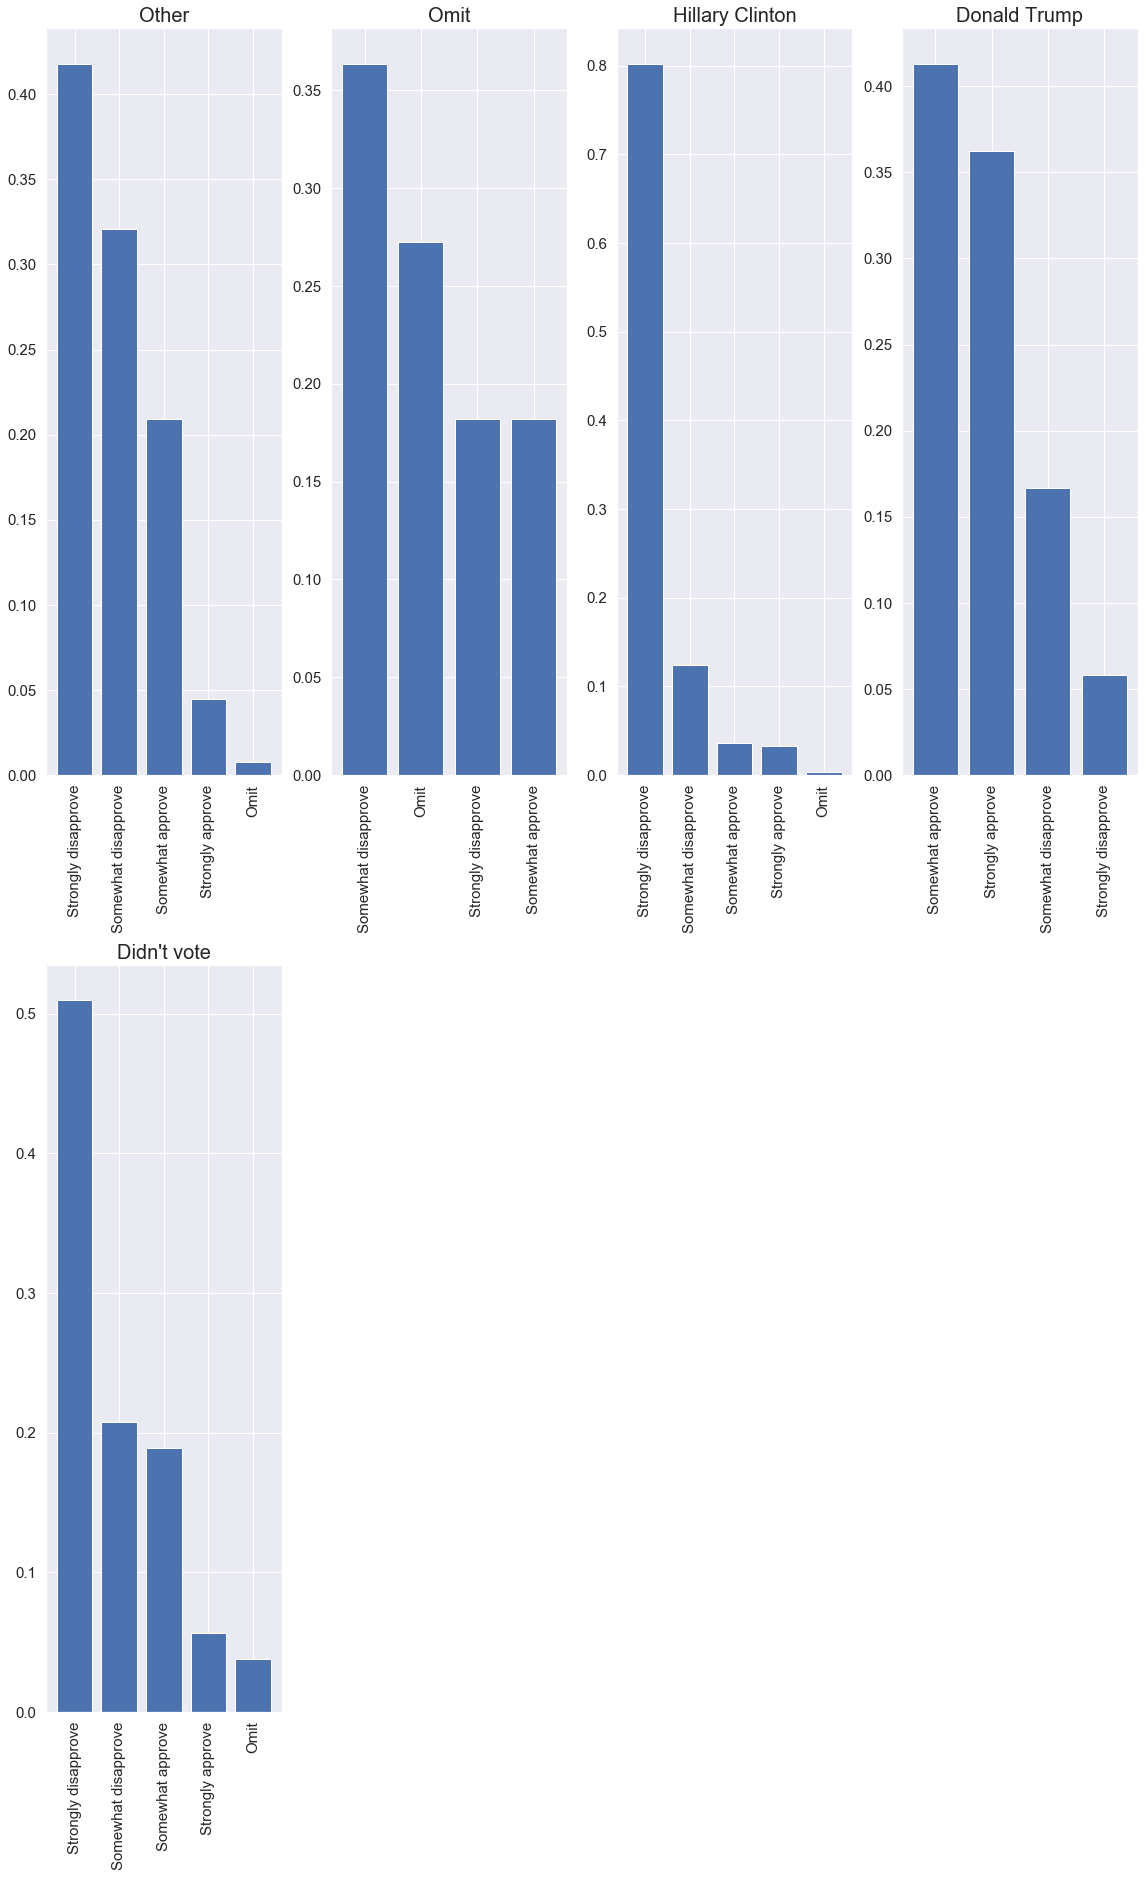

In [248]:
plt.figure(figsize=(16, 50))
for i, g in enumerate(group_vote_2016):
    
    plt.subplot(4, 4, i+1)
    data = df_v1_con_ind[df_v1_con_ind['VOTE2016']==g]['TRUMP4'].value_counts(normalize=True)
    plt.bar(x=data.index, height=data)
    plt.xticks(rotation=90)
    plt.title(g, fontdict={'fontsize': 20})
    plt.tick_params(axis='x', which='major', labelsize= 15)
    plt.tick_params(axis='y', labelsize=15)
    plt.tight_layout()

### Moderate Independents

In [285]:
df_v1_mod_ind = df_v1[df_v1['PTYIDEO7'] == 'Moderate Independents']

#### Plot that shows AGEBYRACE and who the person voted for in 2016 

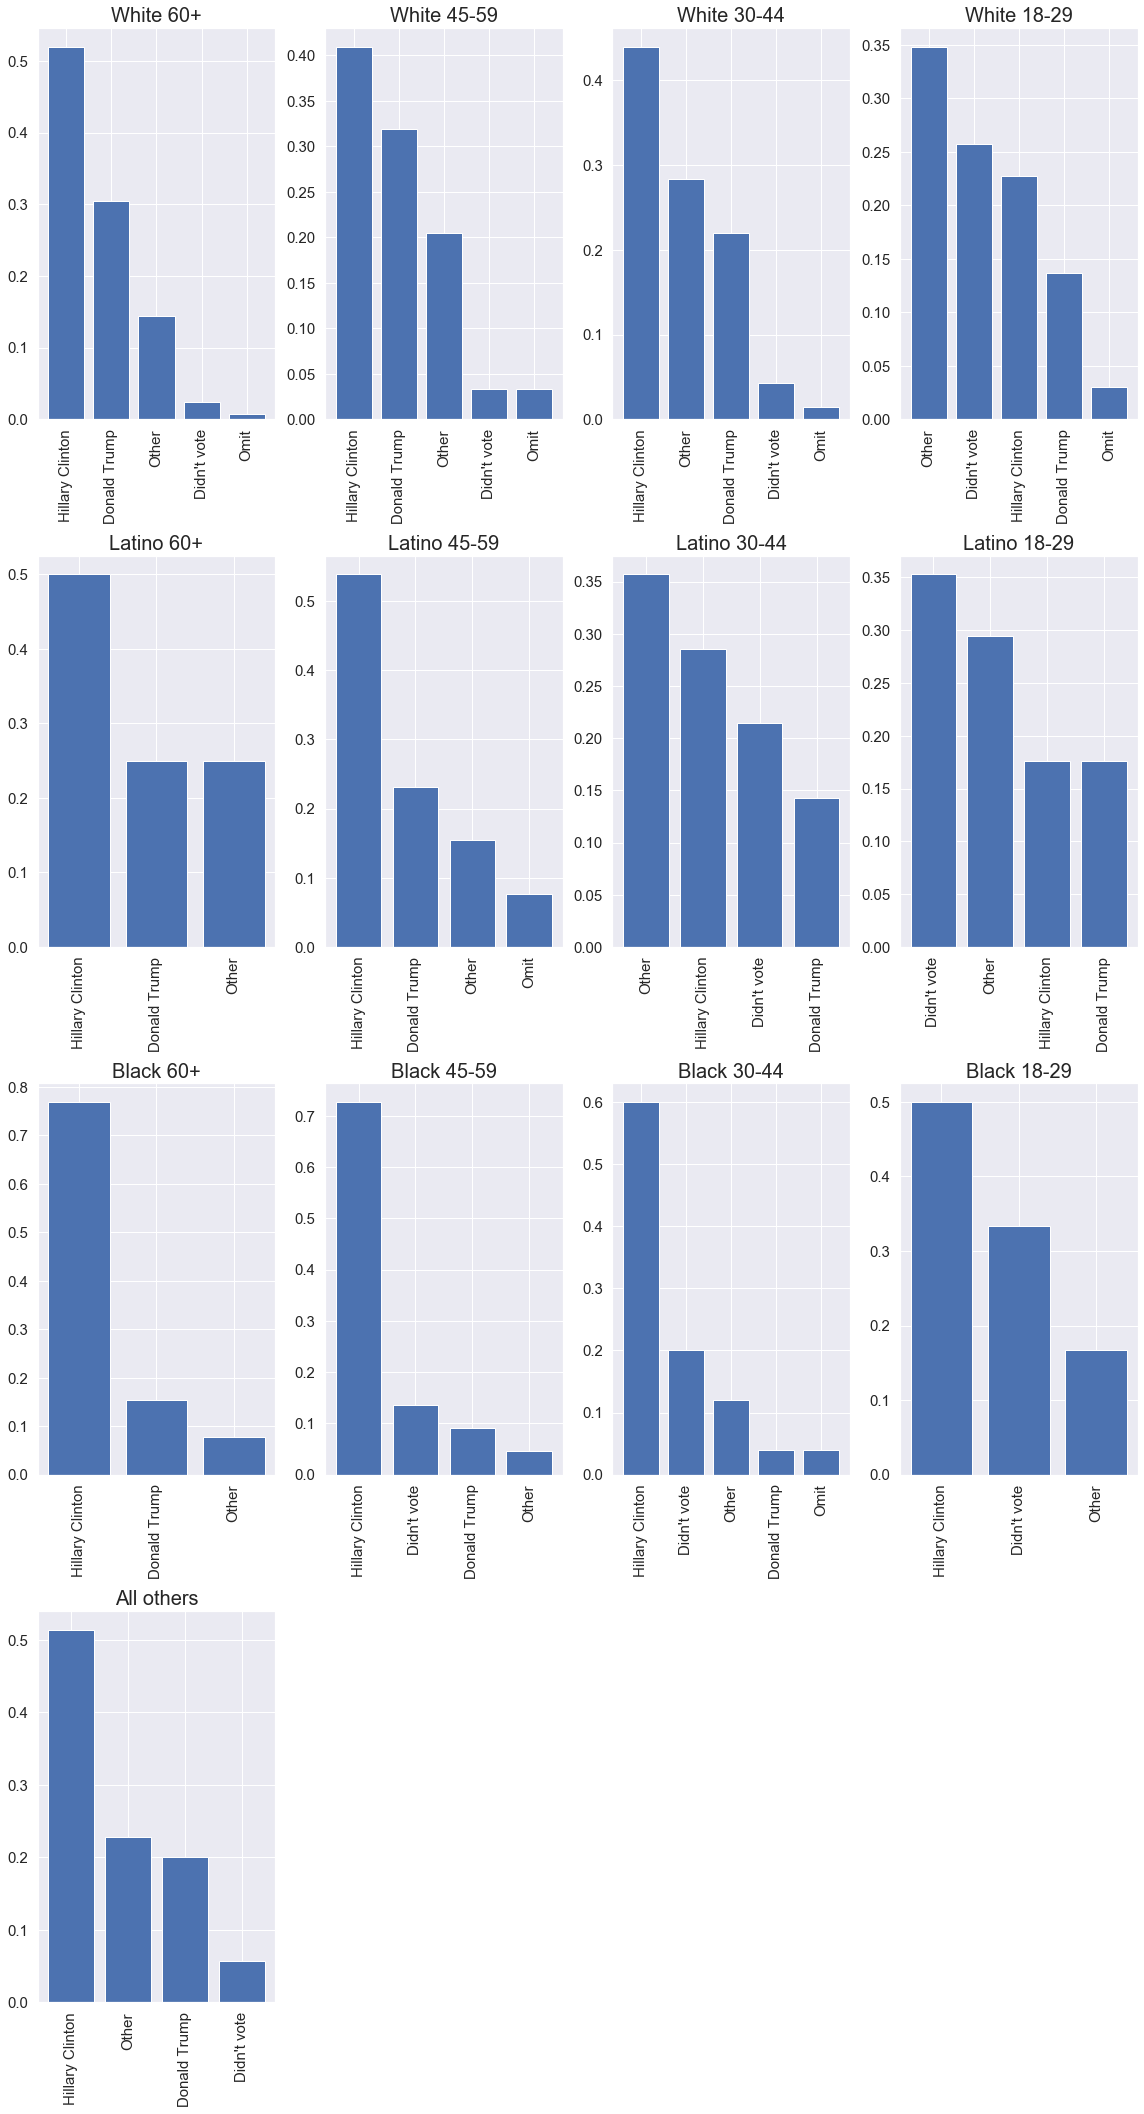

In [254]:
plt.figure(figsize=(16, 50))
for i, g in enumerate(group_age_by_race):
    
    plt.subplot(7, 4, i+1)
    data = df_v1_mod_ind[df_v1_mod_ind['AGEBYRACE']==g]['VOTE2016'].value_counts(normalize=True)
    plt.bar(x=data.index, height=data)
    plt.xticks(rotation=90)
    plt.title(g, fontdict={'fontsize': 20})
    plt.tick_params(axis='x', which='major', labelsize= 15)
    plt.tick_params(axis='y', labelsize=15)
    plt.tight_layout()

#### Plot that shows AGEBYRACE and whether or not the participant was a first time voter 

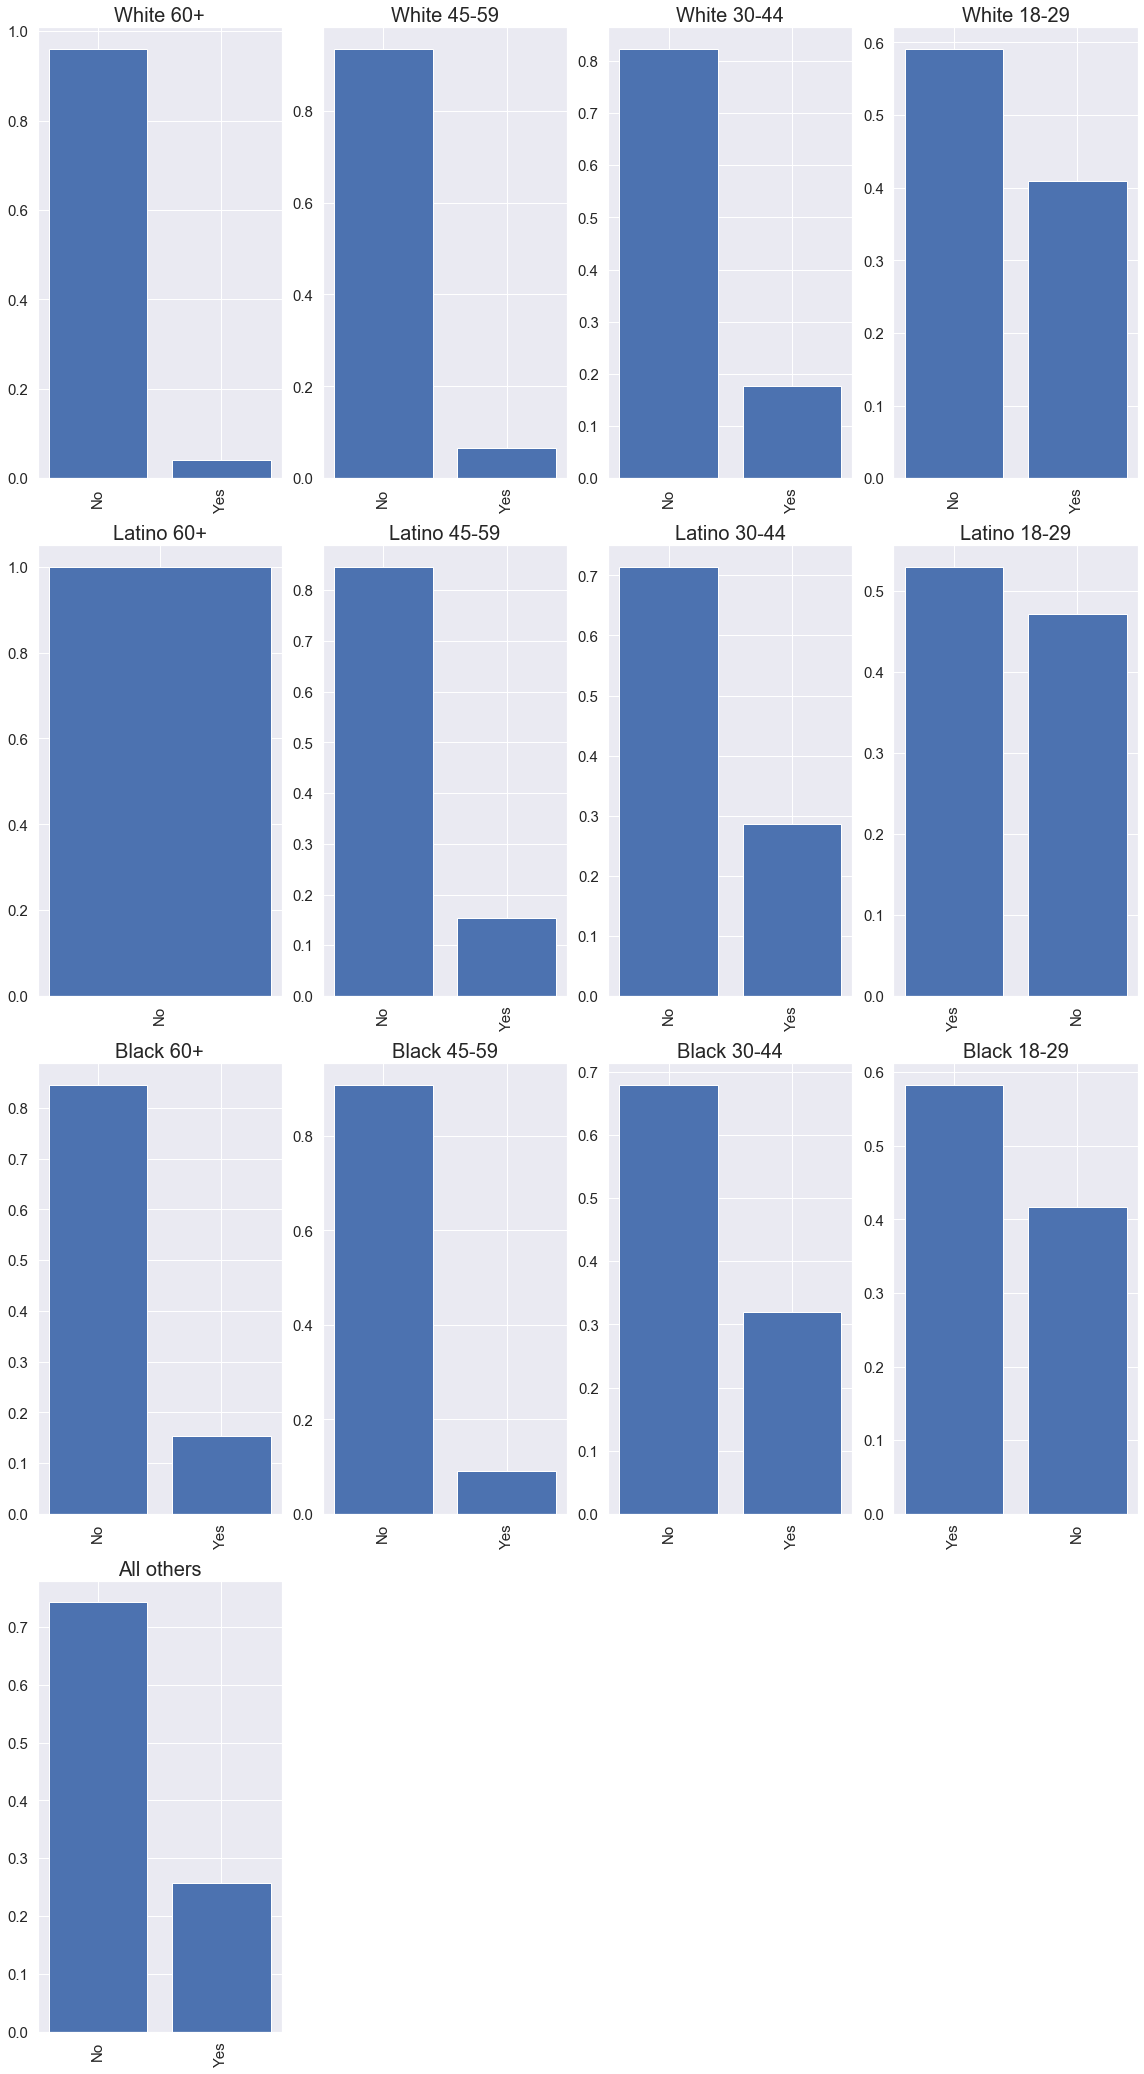

In [255]:
plt.figure(figsize=(16, 50))
for i, g in enumerate(group_age_by_race):
    
    plt.subplot(7, 4, i+1)
    data = df_v1_mod_ind[df_v1_mod_ind['AGEBYRACE']==g]['FTVOTER18'].value_counts(normalize=True)
    plt.bar(x=data.index, height=data)
    plt.xticks(rotation=90)
    plt.title(g, fontdict={'fontsize': 20})
    plt.tick_params(axis='x', which='major', labelsize= 15)
    plt.tick_params(axis='y', labelsize=15)
    plt.tight_layout()

#### Plot that shows who a participant voted for in 2016 and their support of Trump

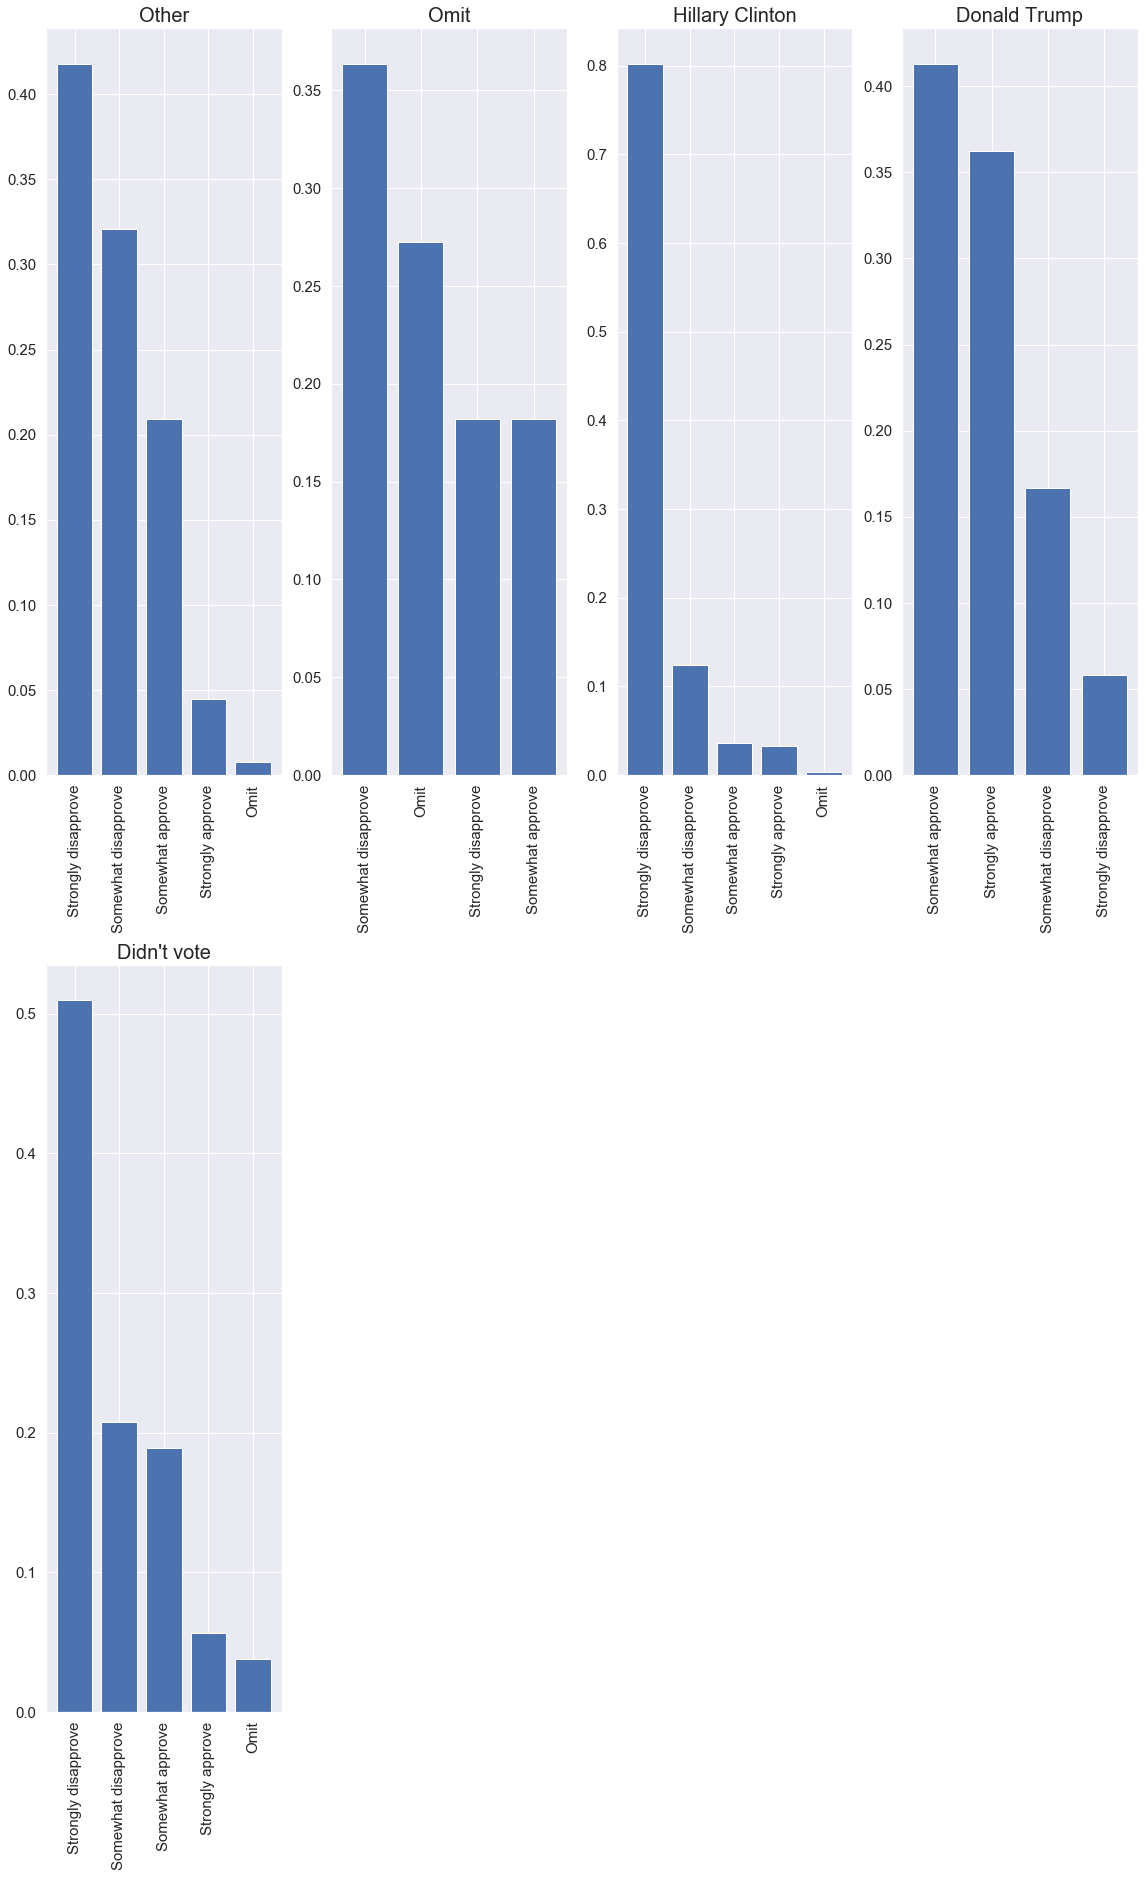

In [256]:
plt.figure(figsize=(16, 50))
for i, g in enumerate(group_vote_2016):
    
    plt.subplot(4, 4, i+1)
    data = df_v1_mod_ind[df_v1_mod_ind['VOTE2016']==g]['TRUMP4'].value_counts(normalize=True)
    plt.bar(x=data.index, height=data)
    plt.xticks(rotation=90)
    plt.title(g, fontdict={'fontsize': 20})
    plt.tick_params(axis='x', which='major', labelsize= 15)
    plt.tick_params(axis='y', labelsize=15)
    plt.tight_layout()

### All Independents 

In [276]:
df_v1_all_ind = pd.concat([df_v1_con_ind, df_v1_mod_ind, df_v1_lib_ind])

#### Plot that shows AGEBYRACE and who the person voted for in 2016 

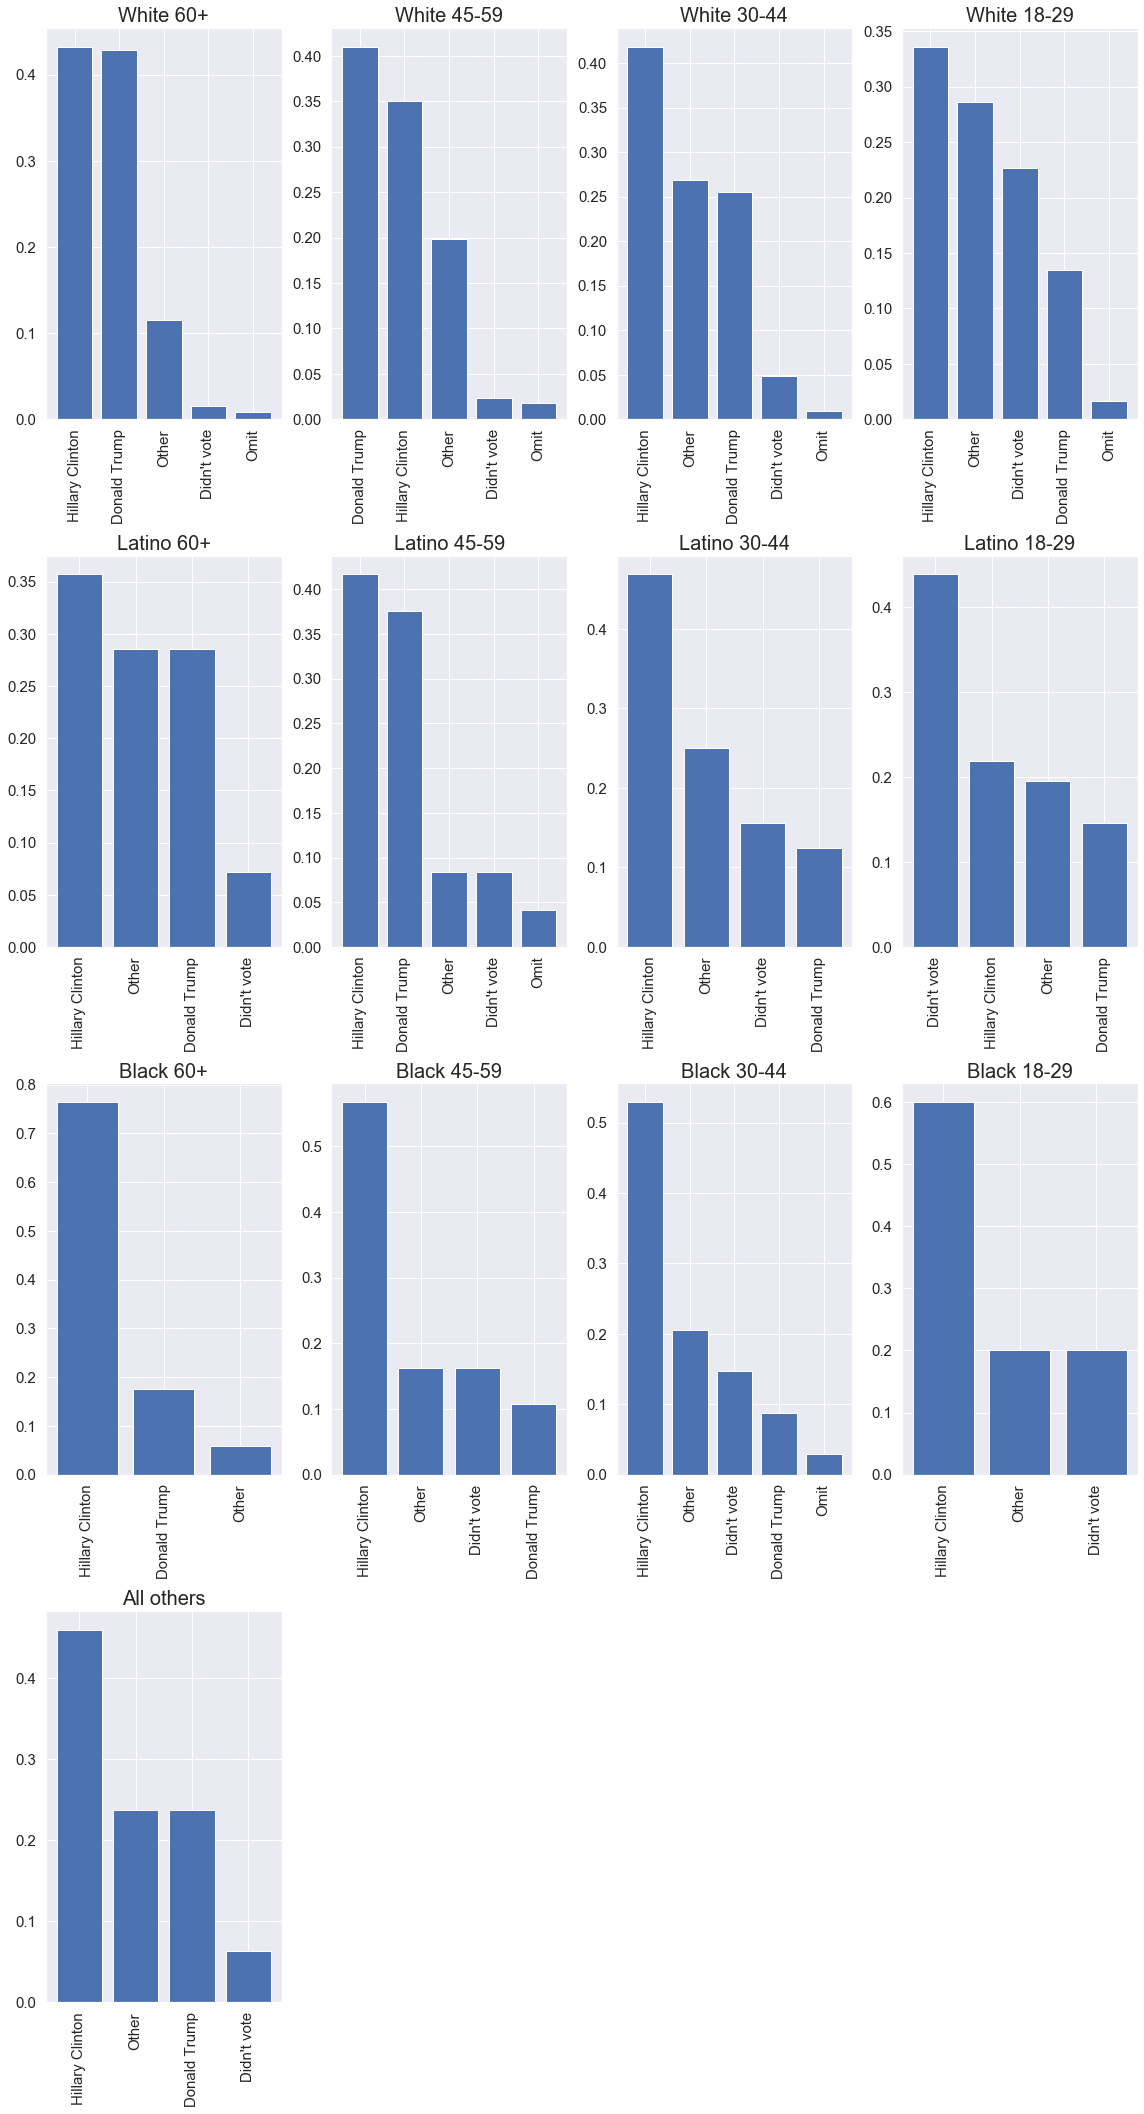

In [277]:
plt.figure(figsize=(16, 50))
for i, g in enumerate(group_age_by_race):
    
    plt.subplot(7, 4, i+1)
    data = df_v1_all_ind[df_v1_all_ind['AGEBYRACE']==g]['VOTE2016'].value_counts(normalize=True)
    plt.bar(x=data.index, height=data)
    plt.xticks(rotation=90)
    plt.title(g, fontdict={'fontsize': 20})
    plt.tick_params(axis='x', which='major', labelsize= 15)
    plt.tick_params(axis='y', labelsize=15)
    plt.tight_layout()

#### Plot that shows AGEBYRACE and whether or not the participant was a first time voter 

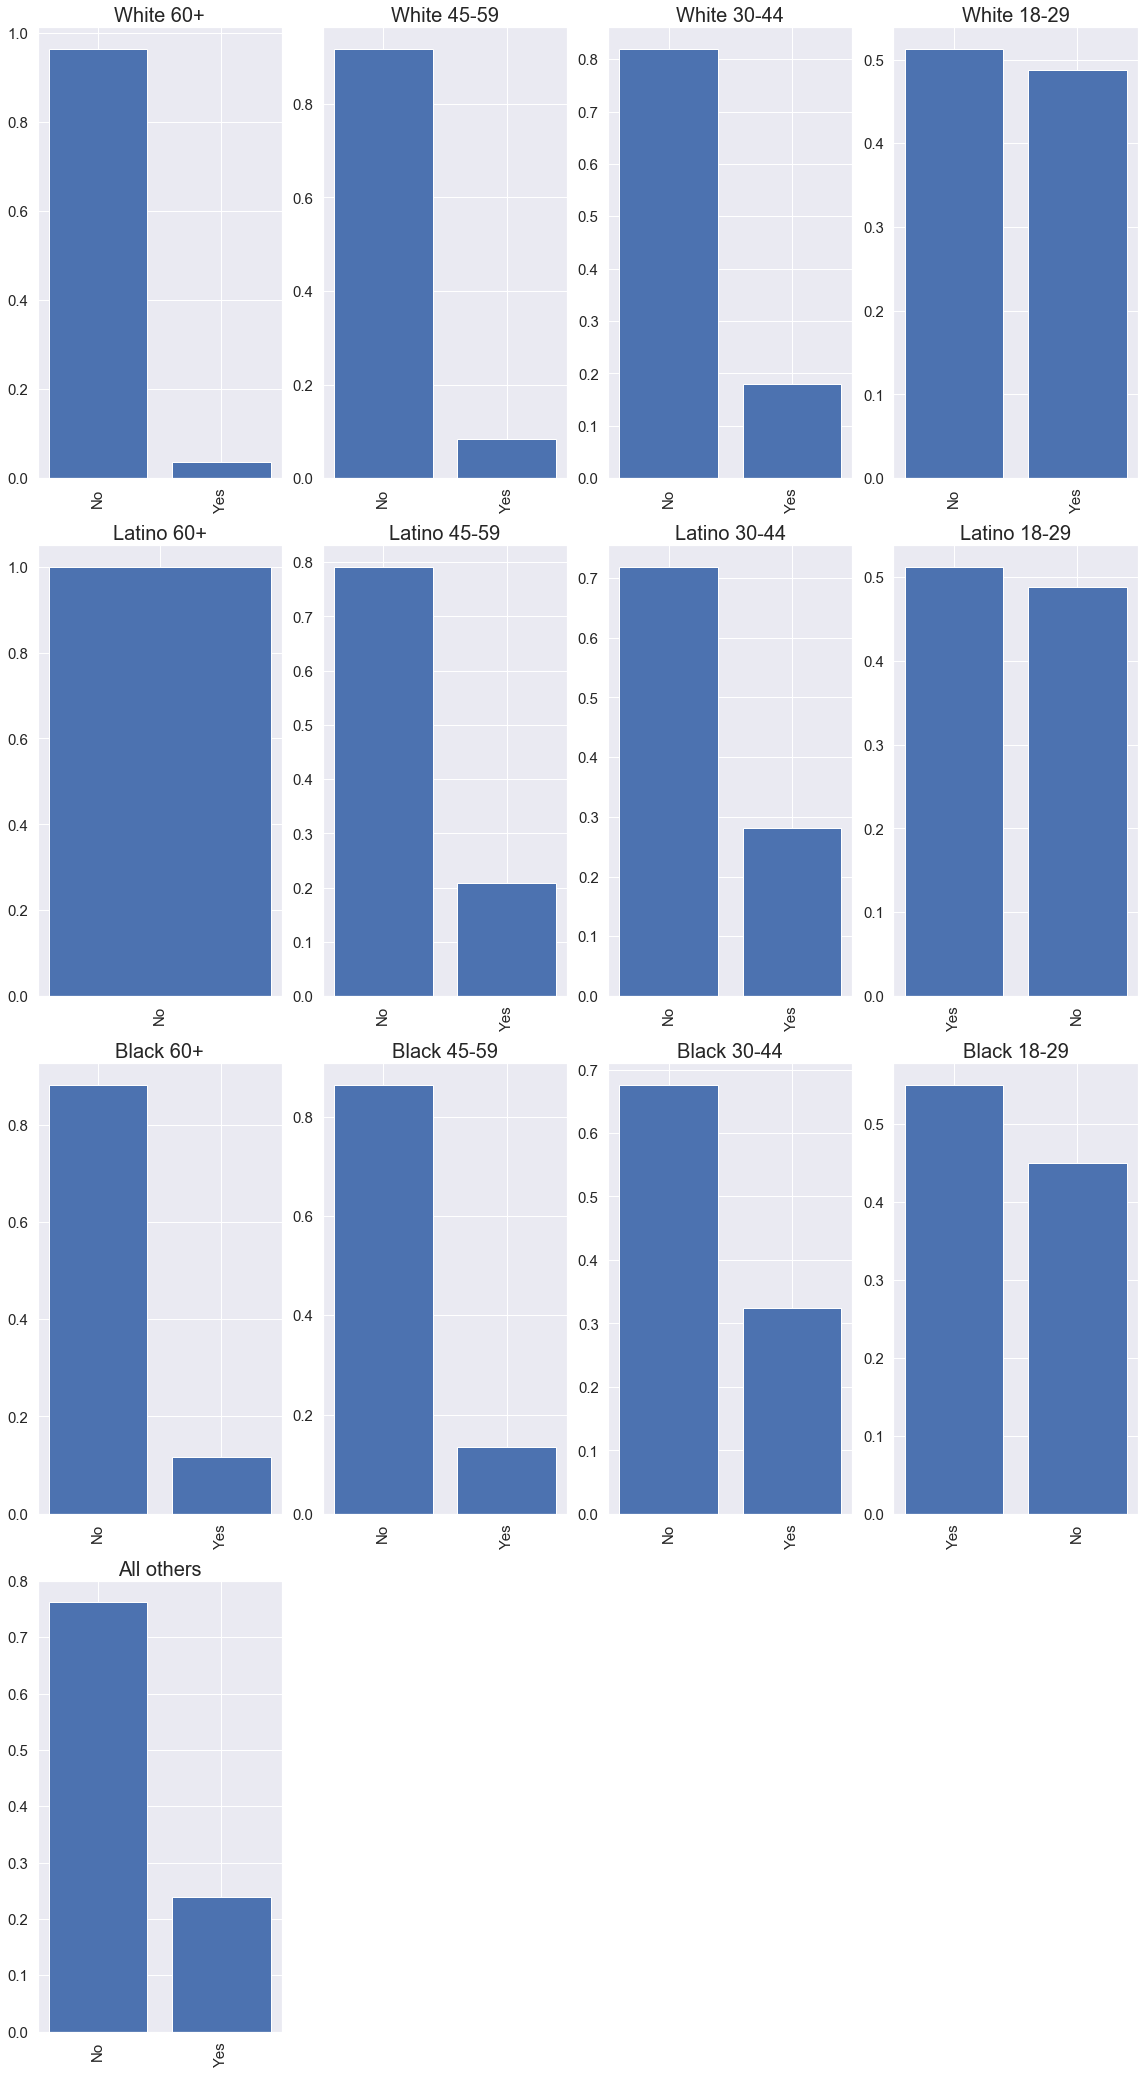

In [278]:
plt.figure(figsize=(16, 50))
for i, g in enumerate(group_age_by_race):
    
    plt.subplot(7, 4, i+1)
    data = df_v1_all_ind[df_v1_all_ind['AGEBYRACE']==g]['FTVOTER18'].value_counts(normalize=True)
    plt.bar(x=data.index, height=data)
    plt.xticks(rotation=90)
    plt.title(g, fontdict={'fontsize': 20})
    plt.tick_params(axis='x', which='major', labelsize= 15)
    plt.tick_params(axis='y', labelsize=15)
    plt.tight_layout()

#### Plot that shows who a participant voted for in 2016 and their support of Trump

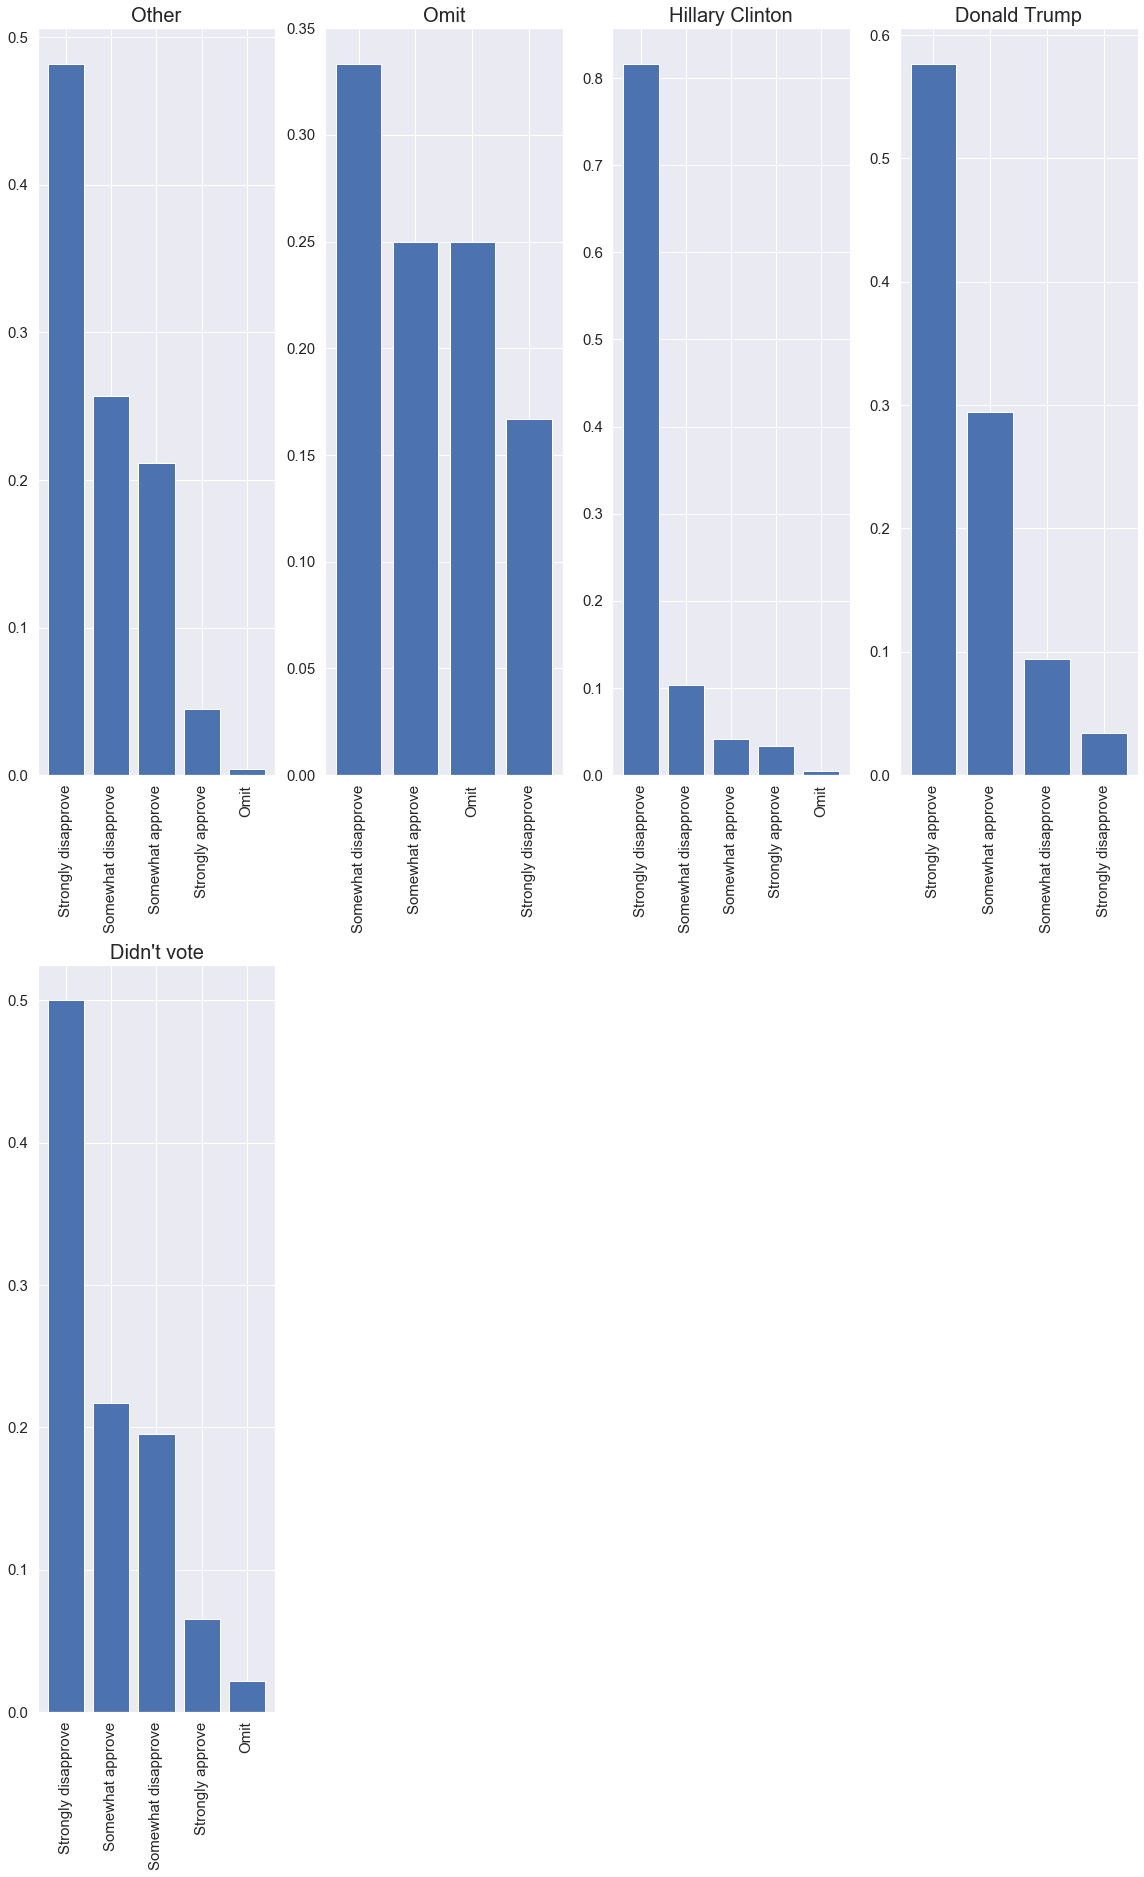

In [279]:
plt.figure(figsize=(16, 50))
for i, g in enumerate(group_vote_2016):
    
    plt.subplot(4, 4, i+1)
    data = df_v1_all_ind[df_v1_all_ind['VOTE2016']==g]['TRUMP4'].value_counts(normalize=True)
    plt.bar(x=data.index, height=data)
    plt.xticks(rotation=90)
    plt.title(g, fontdict={'fontsize': 20})
    plt.tick_params(axis='x', which='major', labelsize= 15)
    plt.tick_params(axis='y', labelsize=15)
    plt.tight_layout()


### Other Visualizations 

### Breakdown of which candidate each political subgroup voted for

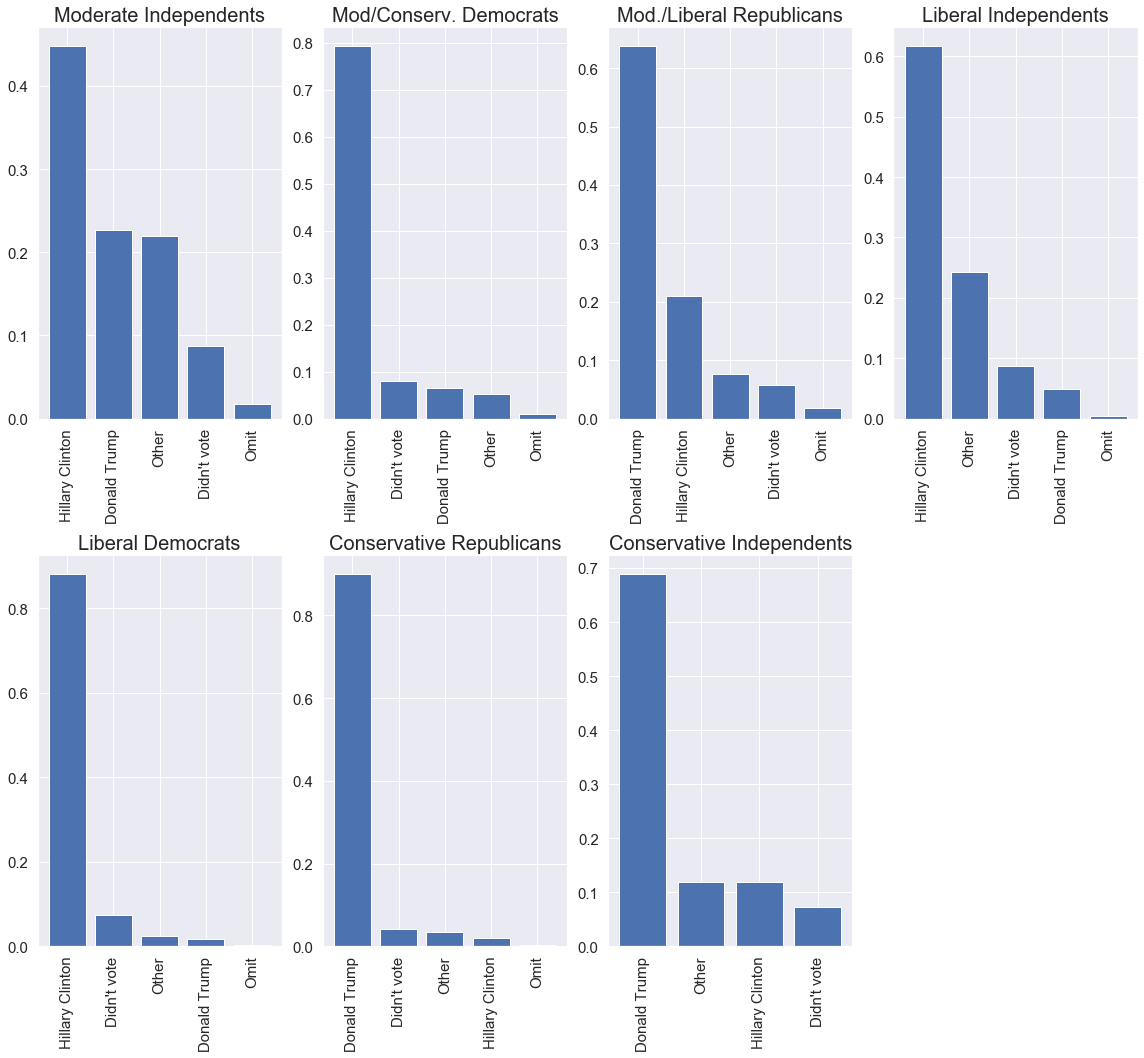

In [287]:
plt.figure(figsize=(16, 50))
for i, g in enumerate(group_poly_afil):
    
    plt.subplot(7, 4, i+1)
    data = df_v1[df_v1['PTYIDEO7']==g]['VOTE2016'].value_counts(normalize=True)
    plt.bar(x=data.index, height=data)
    plt.xticks(rotation=90)
    plt.title(g, fontdict={'fontsize': 20})
    plt.tick_params(axis='x', which='major', labelsize= 15)
    plt.tick_params(axis='y', labelsize=15)
    plt.tight_layout()